[[0.43125    0.39999999 0.37583332 ... 0.60583331 0.57416666 0.50833332]
 [0.40958332 0.37958332 0.35999999 ... 0.62291665 0.54499999 0.47124999]
 [0.37249999 0.35749998 0.33583333 ... 0.57041665 0.47541665 0.39999999]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[[0.5142857  0.50321428 0.51357142 ... 0.53142855 0.49107141 0.49214284]
 [0.49035713 0.48607142 0.47999999 ... 0.55285712 0.50249999 0.51642855]
 [0.47071427 0.47821428 0.47071428 ... 0.52571427 0.46964284 0.48428571]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[69, 45, 45, 38, 51, 23, 49, 54, 59, 39, 49, 39]
46.666666666666664
40


[39, 37, 23, 33, 25, 30, 32, 39, 76, 54, 41, 31, 41, 34]
38.214285714285715
40


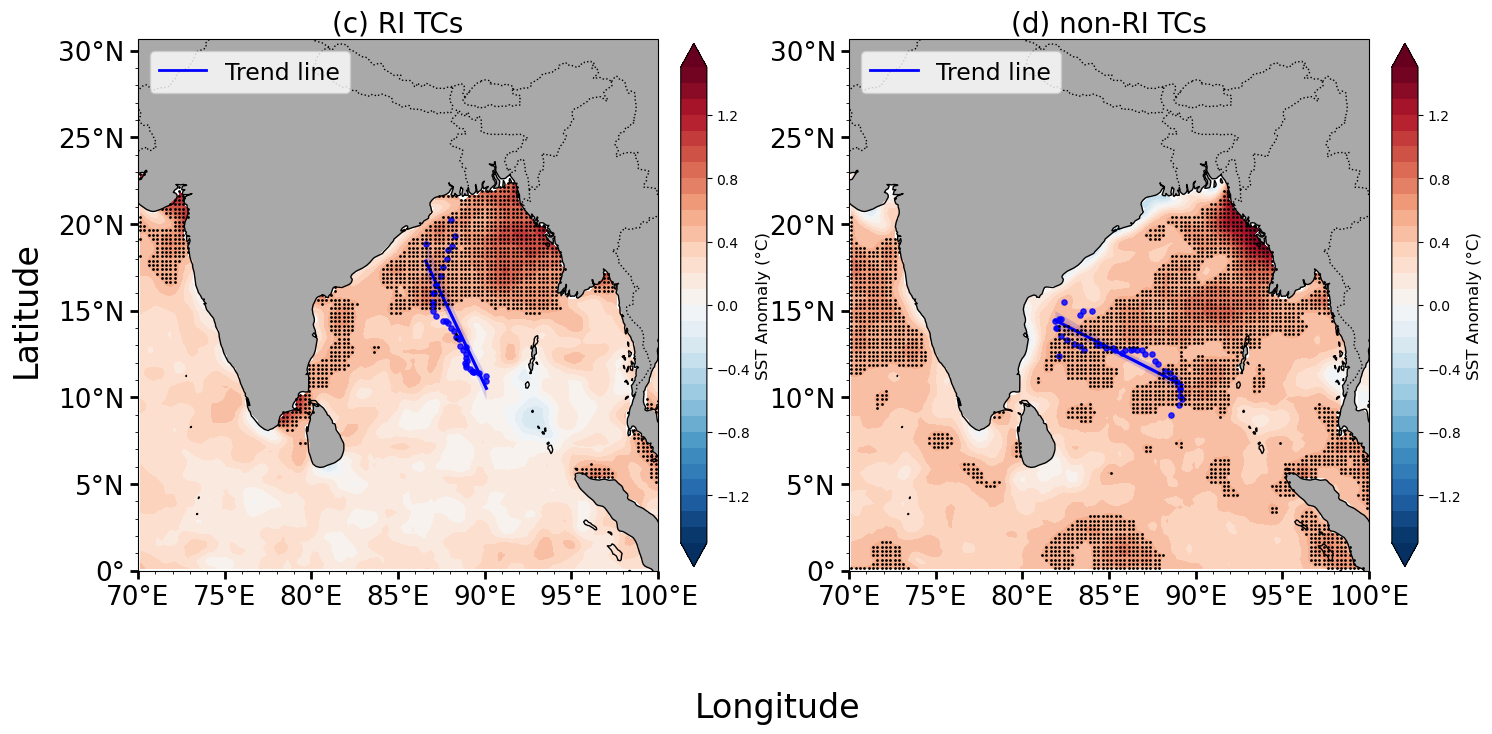

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.cm as cm
import xarray as xr
from scipy.stats import ttest_1samp
import matplotlib.ticker as ticker
import pandas as pd
import cftime
import matplotlib.gridspec as gridspec
import seaborn as sns
# Define the coordinates of the Bay of Bengal region
lon_min, lon_max = 70, 100
lat_min, lat_max = 0, 30
####################################################################################################################
#Premonsoon RI
# Define track data for multiple cyclones
cyclone_tracks1 = [
{
        'name': 'Fani',
        'intensification_range': (23,38),  # Add the rapid intensification range for Cyclone here
        'track': [(2.7, 89.7),(2.7, 89.7), (3.0, 89.4), (3.1, 89.3), (3.2, 89.2), (3.45, 89), (3.7, 88.8), (4.1, 88.8), (4.5, 88.8),
 (4.9, 88.7), (5.2, 88.6), (5.4, 88.5), (5.9, 88.5),(6.3, 88.5), (6.6, 88.2), (6.9, 87.9), (7.3, 87.9), 
 (7.3, 87.9), (7.4, 87.8), (7.7, 87.5), (8.2, 87.0),(8.3, 86.9), (8.4, 86.9), (8.5, 86.9), (8.6, 86.9),
 (8.7, 86.9), (9.2, 86.9), (9.7, 86.8), (10.1, 86.7), (10.4, 86.7), (10.8, 86.6), (11.1, 86.5), (11.7, 86.5),
 (12.3, 86.2), (12.6, 85.7), (13.0, 85.3), (13.3, 84.7), (13.4, 84.5), (13.5, 84.4), (13.6, 84.2), (13.9, 84.0),
 (14.1, 83.9), (14.2, 83.9), (14.5, 84.1), (14.9, 84.1), (15.1, 84.1), (15.2, 84.1), (15.5, 84.2), (15.9, 84.5),
 (16.2, 84.6), (16.7, 84.8), (17.1, 84.8), (17.5, 84.8), (17.8, 84.9), (18.2, 85.0), (18.6, 85.2), (19.1, 85.5),
 (19.6, 85.7), (20.2, 85.9), (20.6, 86.0), (21.1, 86.5), (21.5, 86.7), (21.9, 87.1), (22.5, 87.9), (23.1, 88.2),
 (23.6,  88.8), (24.3, 89.3),(24.75,90.0), (25.2, 90.7),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Amphan',
        'intensification_range': (16,29),  # Add the rapid intensification range for Cyclone here
        'track': [(10.4, 87.0), (10.7, 86.5), (10.9, 86.3), (10.9, 86.3), (10.9, 86.3), (11.0, 86.2), (11.1, 86.1), (11.3, 86.1), 
 (11.4, 86.0), (11.4, 86.0), (11.5, 86.0), (11.7, 86.0), (12.0, 86.0), (12.8, 86.2), (12.5, 86.1), (12.9, 86.4), 
 (13.2, 86.3), (13.3, 86.2), (13.4, 86.2), (13.7, 86.2), (14.0, 86.3), (14.5, 86.4), (14.9, 86.5), (15.2, 86.6), 
 (15.6, 86.7), (16.0, 86.8), (16.5, 86.9), (17.0, 86.9), (17.4, 87.0), (18.1, 87.1), (18.4, 87.2), (18.7, 87.2), 
 (19.1, 87.5), (19.8, 87.7), (20.6, 88.0), (21.4, 88.1), (21.9, 88.4), (22.7, 88.6), (23.3, 89.0), (24.2, 89.0), 
 (24.2, 89.3), (24.7, 89.5), (25.0, 89.6), (25.2,89.6), (25.4, 89.6),] # Add the track data for Cyclone here
       
    },    
{
        'name': 'Mocha',
        'intensification_range': (10,34),  # Add the rapid intensification range for Cyclone here
        'track': [(8.3, 89.5),(8.4,89.4), (8.5, 89.3),(8.5,89.15), (8.5, 89.0), (8.8, 88.9), (9.1, 88.7),(9.55,88.55), (10.0, 88.4),(10.4,88.3), (10.8, 88.2),(11,88.15), (11.2, 88.1),
 (11.4, 88.0), (11.6, 88.0), (11.8, 88.0), (12.2, 88.0), (12.5, 88.1), (12.7, 88.1), (12.9, 88.1), (13.2, 88.1),
 (13.6, 88.2), (14.0, 88.3), (14.3, 88.4), (14.6, 88.6), (14.8, 88.7), (15.1, 88.8), (15.2, 88.9), (15.4, 89.1),
 (15.7, 89.5), (16.0, 90.0), (16.4, 90.3), (16.9, 90.8), (17.4, 90.9), (17.9, 91.0), (18.3, 91.3), (18.7, 91.5),
 (19.3, 91.9), (19.9, 92.5), (20.5, 92.9), (21.1, 93.3), (21.8, 93.8), (22.7, 94.6), (23.5, 95.3), (23.9, 97.8),
 ] # Add the track data for Cyclone here
       
    }, 
{
        'name': 'Mala',
        'intensification_range': (17,32),  # Add the rapid intensification range for Cyclone here
        'track': [(9.5, 90.5), (9.5, 90.5), (9.5, 90.0), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.5, 89.0), (10.5, 89.0),
 (11.0, 89.0), (11.0, 89.5), (11.5, 90.0), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.5, 90.5), (12.5, 90.5),
 (12.5, 90.5), (13.0, 90.5), (13.0, 90.5), (13.0, 90.5), (13.5, 90.5), (14.0, 91.0), (14.5, 91.5), (15.0, 92.0), (15.3, 92.3), 
 (15.5, 92.5), (16.0, 93.0), (16.0, 93.0), (16.5, 93.5), (16.5, 93.5), (17.0, 94.0), (17.5, 94.5), (18.0, 95.0), (18.5, 95.5),
 (18.5, 95.5), (19.0, 96.0),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Nargis',
        'intensification_range':  (2,10),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0, 87.0), (12.0, 87.0), (12.0, 86.5), (12.0, 86.5), (12.0, 86.5), (12.5, 86.0), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5),
        (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.5, 85.5), (13.5, 85.5), 
        (13.5, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 86.0), (14.0, 86.0), (14.5, 86.5), (14.5, 86.5), (14.5, 87.0), 
        (14.5, 87.0), (15.0, 87.5), (15.0, 87.5), (15.0, 87.5), (15.5, 88.0), (15.5, 89.0), (16.0, 89.5), (16.0, 90.0), (16.0, 90.5), 
        (16.0, 91.0), (16.0, 91.5), (16.0, 92.0), (16.0, 92.5), (16.0, 93.0), (16.0, 93.5), (16.0, 94.0), (16.0, 94.3), (16.0, 95.0), 
        (16.5, 95.5), (16.5, 95.5), (16.5, 95.5), (17.0, 96.0), (17.5, 96.5), (18.0, 97.0),]
     
   },
{
        'name': 'Giri',
        'intensification_range': (0,16),  # Add the rapid intensification range for Cyclone here
        'track': [(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(18.0,92),(18.0,92),
 (18.0,92.0),(18.5,92.5),(18.5,92.5),(19.0,93),(19.0,93),(19.5,93.5),(19.8,93.5),(20.0,93.5),
 (20.5,94),(20.5,94),(21.0,94.5),(21.5,95),(22.0,95.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Phailin',
        'intensification_range': (9,28),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0,96.0),(12.0,95.5),(12.0,95),(12.0,94.5),(12.25,94.25),(12.5,94.0),(13.0,93.5),(13.0,93.5),(13.0,93.0),(13.5,92.5),
 (13.5,92.5),(13.6,92.5),(14.0,92.0),(14.0,92.0),(14.5,91.5),(14.5,91.0),(15.0,90.5),(15.0,90.5),
 (15.5,90.0),(15.5,90.0),(15.5,89.5),(15.5,89.0),(16.0,88.5),(16.0,88.5),(16.2,88.3),(16.5,88.0),
 (16.8,87.7),(16.9,87.2),(17.0,87.0),(17.1,86.8),(17.5,86.5),(17.8,86.0),(18.1,85.7),(18.6,85.4),
 (18.7,85.2),(19.1,85.2),(19.5,84.8),(20.0,84.5),(20.5,84.5),(21.0,84.0),(21.5,84.0),(21.8,83.8),
 (22.5,83.8),(22.75,83.65),(23.0,83.5),(23.25,83.75),(23.5,84.0),(24.0,84.1),(24.5,84.2),]  # Add the track data for Cyclone 
       
    },
{
        'name': 'Madi',
        'intensification_range': (0,13),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0,84.0),(10.0,84.0),(10.1,84.0),(10.2,84.0),(10.3,84.0),(10.4,84.0),(10.45,84.05),(10.5,84.1),(10.5,84.1),(10.7,84.2),(10.8,84.3),
 (11.0,84.4),(11.0,84.5),(11.2,84.5),(11.5,84.6),(11.8,84.6),(12.0,84.6),(12.3,84.7),(12.6,84.7),
 (13.0,84.7),(13.2,84.7),(13.4,84.7),(13.6,84.7),(13.8,84.7),(14.0,84.7),(14.3,84.7),(14.4,84.7),
 (14.6,84.7),(14.7,84.7),(14.8,84.8),(14.8,84.8),(15.0,85.0),(15.3,85.3),(15.4,85.3),(15.7,85.3),
 (15.4,85.0),(15.1,84.8),(14.9,84.7),(14.6,84.6),(14.3,84.2),(14.0,83.8),(13.7,83.5),(13.5,83.4),
 (13.3,83.3),(13.1,83.5),(12.9,82.7),(12.7,82.35),(12.5,82.0),(12.0,81.5),(11.5,81.2),(11.0,80.7),(10.5,80.0),(10.25,78.9),
 (10.0,78.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Hudhud',
        'intensification_range': (33,42),  # Add the rapid intensification range for Cyclone here
        'track': [(11.5, 95.0), (11.7, 94.8), (11.85,94.4),(12.0, 94.0), (12.0,93.75),(12.0, 93.5),(12.1,93.25), (12.2, 93.0), (12.3, 92.9), (12.5, 92.5), (12.7, 91.7),
 (12.8, 91.0), (13.0, 90.5), (13.2, 90.2), (13.5, 89.6), (13.7, 89.2), (13.8, 89.0), (13.9, 88.8), (14.6, 88.6),
 (14.1, 88.4), (14.1, 88.1), (14.1, 87.9), (14.3, 87.7), (14.4, 87.6), (14.7, 87.2), (14.8, 87.0), (15.0, 86.8),
 (15.2, 86.7), (15.4, 86.5), (15.5, 86.4), (15.7, 86.1), (15.9, 85.7), (16.0, 85.4), (16.1, 85.1), (16.1, 85.0),
 (16.2, 84.8), (16.2, 84.8), (16.4, 84.7), (16.7, 84.4), (17.2, 84.2), (17.4, 83.8), (17.6, 83.4), (17.8, 83.0),
 (18.0, 82.7), (18.3, 82.5), (18.7, 82.3), (18.7, 82.3), (19.5, 81.5), (20.5, 81.5), (20.7, 81.5),(21.0,81.5), (21.3, 81.5),(21.8,81.5),
 (22.3, 81.5),(23.55,81.5), (24.8, 81.5), (25.1, 81.6), (25.6, 81.7), (26.3, 81.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Titli',
        'intensification_range': (8,23),  # Add the rapid intensification range for Cyclone here
        'track': [(14.0, 88.8), (14.0, 88.8),(14.15,88.5), (14.3, 88.2),(14.4,87.9), (14.5, 87.6),(14.6,87.35), (14.7, 87.1), (14.7, 86.9), (14.8, 86.7), (14.9, 86.6),
 (15.1, 86.4), (15.3, 86.2), (15.5, 86.0), (15.7, 85.8), (16.0, 85.8), (16.5, 85.8), (17.0, 85.6), (17.3, 85.4),
 (17.5, 85.3), (17.7, 85.2), (18.2, 85.1), (18.6, 84.7), (18.8, 84.4), (19.0, 84.1), (19.3, 83.8), (19.6, 83.8), 
 (19.9, 83.7), (20.1, 84.0), (20.3, 84.3),(20.4,84.5), (20.5, 84.7), (20.6, 84.9), (20.8, 85.2), (20.9, 85.5), (21.2, 86.1), (21.55,86.65),
 (21.9, 87.2), (22.1, 87.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Bulbul',
        'intensification_range': (6,18),  # Add the rapid intensification range for Cyclone here
        'track': [(13.1, 91.5), (13.1, 91.0), (13.1, 90.7),(13.15,90.4), (13.2, 90.1),(13.25,89.95), (13.3, 89.8),(13.35,89.75), (13.4, 89.7), (13.4, 89.6), (13.4, 89.4),
 (13.45,89.35),(13.5, 89.3),(13.65,89.3), (13.8, 89.3),(14.0,89.3), (14.2, 89.3), (14.7, 89.3), (15.3, 88.7), (15.5, 88.4), (15.9, 88.0), (16.2, 87.9), 
 (16.4, 87.8), (16.6, 87.7), (16.9, 87.6), (17.2, 87.6), (17.6, 87.6), (18.1, 87.6), (18.5, 87.6), (19.2, 87.7), 
 (19.3, 87.6), (19.6, 87.7), (20.0, 87.6), (20.4, 87.6), (20.6, 87.8), (20.9, 87.9), (21.2, 88.1), (21.4, 88.3), 
 (21.6, 88.6), (21.9, 89.1), (22.1, 89.5), (22.2, 89.7), (22.3, 90.0), (22.4, 90.1), (22.5, 90.4),(22.6,90.8),(22.7, 91.2), (22.9,91.55),
 (23.1, 91.9),] # Add the track data for Cyclone here
       
    },  
{
        'name': 'Sidr',
        'intensification_range':  (1,18),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0, 92.0), (10.0, 92.0), (10.0, 92.0), (10.5, 91.5), (10.5, 91.5), (10.5, 91.5), (10.5, 91.0), (11.0, 90.5), (11.0, 90.5),
      (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (12.0, 89.5), (12.0, 89.5), (12.0, 89.5), (13.0, 89.5), (13.0, 89.5),
      (13.0, 89.5), (13.5, 89.5), (14.0, 89.5), (14.5, 89.5), (14.5, 89.5), (15.0, 89.5), (15.5, 89.5), (16.0, 89.0), (16.0, 89.0), 
      (16.5, 89.0), (17.0, 89.0), (17.5, 89.0), (18.0, 89.0), (19.5, 89.0), (20.0, 89.0), (21.0, 89.0), (21.5, 89.5), (22.5, 90.5), 
      (23.5, 91.0), (23.5, 91.0), (24.5, 91.5),]
     
    },


    
    # Add more cyclone track data lists as needed
]

# Convert date strings to datetime objects
start_date_amphan = cftime.DatetimeGregorian(2020,5,18)
end_date_amphan = cftime.DatetimeGregorian(2020, 5, 19)
start_date_mocha = cftime.DatetimeGregorian(2023, 5, 11)
end_date_mocha = cftime.DatetimeGregorian(2023, 5, 12)
start_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
end_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
start_date_fani = cftime.DatetimeGregorian(2019, 4, 29)
end_date_fani = cftime.DatetimeGregorian(2019, 4, 30)
start_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
end_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
start_date_giri = cftime.DatetimeGregorian(2010,10,20)
end_date_giri= cftime.DatetimeGregorian(2010, 10, 21)
start_date_phailin = cftime.DatetimeGregorian(2013, 10, 10)
end_date_phailin = cftime.DatetimeGregorian(2013, 10, 11)
start_date_madi = cftime.DatetimeGregorian(2013, 12, 6)
end_date_madi = cftime.DatetimeGregorian(2013, 12, 7)
start_date_hudhud = cftime.DatetimeGregorian(2014, 10, 10)
end_date_hudhdud= cftime.DatetimeGregorian(2014, 10, 10)
start_date_titli = cftime.DatetimeGregorian(2018, 10, 9)
end_date_titli = cftime.DatetimeGregorian(2018, 10, 10)
start_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
end_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
start_date_sidr = cftime.DatetimeGregorian(2007, 11, 12)
end_date_sidr = cftime.DatetimeGregorian(2007, 11, 13)
# Load the SST data from the downloaded NetCDF file
sst_data = xr.open_dataset('/DISK-0/gokul/ENGY/data/sst.day.anom.2005-2023.nc')
sst_amphan = sst_data.sel(time=slice(str(start_date_amphan), str(end_date_amphan)), lat=slice(0, 35), lon=slice(70, 105))
sst_mocha = sst_data.sel(time=slice(str(start_date_mocha), str(end_date_mocha)), lat=slice(0, 35), lon=slice(70, 105))
sst_mala = sst_data.sel(time=slice(str(start_date_mala), str(end_date_mala)), lat=slice(0, 35), lon=slice(70, 105))
sst_fani = sst_data.sel(time=slice(str(start_date_fani), str(end_date_fani)), lat=slice(0, 35), lon=slice(70, 105))
sst_nargis = sst_data.sel(time=slice(str(start_date_nargis), str(end_date_nargis)), lat=slice(0, 35), lon=slice(70, 105))
sst_giri = sst_data.sel(time=slice(str(start_date_giri), str(end_date_giri)), lat=slice(0, 35), lon=slice(70, 105))
sst_phailin = sst_data.sel(time=slice(str(start_date_phailin), str(end_date_phailin)), lat=slice(0, 35), lon=slice(70, 105))
sst_madi = sst_data.sel(time=slice(str(start_date_madi), str(end_date_madi)), lat=slice(0, 35), lon=slice(70, 105))
sst_hudhud = sst_data.sel(time=slice(str(start_date_hudhud), str(end_date_hudhdud)), lat=slice(0, 35), lon=slice(70, 105))
sst_titli = sst_data.sel(time=slice(str(start_date_titli), str(end_date_titli)), lat=slice(0, 35), lon=slice(70, 105))
sst_bulbul = sst_data.sel(time=slice(str(start_date_bulbul), str(end_date_bulbul)), lat=slice(0, 35), lon=slice(70, 105))
sst_sidr = sst_data.sel(time=slice(str(start_date_sidr), str(end_date_sidr)), lat=slice(0, 35), lon=slice(70, 105))

sst_values1 = sst_amphan['anom'] 
sst_values2 = sst_mocha['anom'] 
sst_values3 = sst_mala['anom'] 
sst_values4 = sst_fani['anom'] 
sst_values5 = sst_nargis['anom'] 
sst_valuesri1 = sst_giri['anom'] 
sst_valuesri2 = sst_phailin['anom'] 
sst_valuesri3 = sst_madi['anom'] 
sst_valuesri4 = sst_hudhud['anom'] 
sst_valuesri5 = sst_titli['anom'] 
sst_valuesri6 = sst_bulbul['anom'] 
sst_valuesri7 = sst_sidr['anom'] 
sst_anom1 = np.mean(sst_values1.values, axis=0)
sst_anom2 = np.mean(sst_values2.values, axis=0)
sst_anom3 = np.mean(sst_values3.values, axis=0)
sst_anom4 = np.mean(sst_values4.values, axis=0)
sst_anom5 = np.mean(sst_values5.values, axis=0)
sst_anomri1 = np.mean(sst_valuesri1.values, axis=0)
sst_anomri2 = np.mean(sst_valuesri2.values, axis=0)
sst_anomri3 = np.mean(sst_valuesri3.values, axis=0)
sst_anomri4 = np.mean(sst_valuesri4.values, axis=0)
sst_anomri5 = np.mean(sst_valuesri5.values, axis=0)
sst_anomri6 = np.mean(sst_valuesri6.values, axis=0)
sst_anomri7 = np.mean(sst_valuesri7.values, axis=0)

sst_anomaly1 = np.mean([sst_anom1, sst_anom2, sst_anom3, sst_anom4, sst_anom5,sst_anomri1,sst_anomri2,sst_anomri3,sst_anomri4,sst_anomri5,sst_anomri6,sst_anomri7], axis=0)

print(sst_anomaly1)


################################################################################################################
# Premonsoon Non-RI
# Define track data for multiple cyclones
cyclone_tracks2 = [
{
        'name': 'Asani',
        'track': [(9.4, 91.3),(9.85,90.85), (10.3, 90.4),(10.55,90.25), (10.8, 90.1),(11.05,89.7), (11.3, 89.3), (11.5, 89.0),
         (11.8, 88.7), (12.0, 88.4), (12.3, 88.2), (12.7, 87.8), (13.1, 87.5), (13.5, 87.1), (13.9, 86.8),
         (14.2, 86.5), (14.6, 86.3), (14.7, 86.0), (14.9, 85.8), (15.0, 85.5), (15.1, 85.2), (15.2, 84.9),
         (15.3, 84.6), (15.4, 84.0), (15.5, 83.5), (15.6, 83.1), (15.7, 82.8), (15.8, 82.4), (15.9, 82.1),
         (16.0, 81.9), (16.1, 81.8), (16.1, 81.6), (16.2, 81.5), (16.2, 81.4), (16.3, 81.4), (16.3, 81.3),
         (16.3, 81.2),(16.25,81.05), (16.2, 80.9),]
    },
{
        'name': 'Yaas',
        'track': [(16.1, 90.2),(16.15,90.05), (16.2, 89.9),(16.25,89.8), (16.3, 89.7), (16.3, 89.7), (16.3, 89.7), 
      (16.5, 89.6), (16.4, 89.6), (16.8, 89.5), (17.1, 89.3), (17.4, 89.2), (17.6, 89.0), (17.8, 88.9),
      (18.0, 88.6), (18.3, 88.3), (18.7, 88.0), (19.1, 88.1), (19.5, 88.0), (19.8, 87.9), (20.1, 87.8), 
      (20.4, 87.6), (20.8, 87.3), (21.2, 87.1), (21.4, 86.9), (21.6, 86.7), (21.8, 86.6), (22.2, 86.2), 
      (22.5, 86.0),(22.65,85.9), (22.8, 85.8), (23.1, 85.7), (23.5, 85.6),(23.9,85.45), (24.3, 85.3),(24.45,85.05), 
      (24.7, 84.8),]
       
    },
{
        'name': 'Mora',
        'track': [(14.0, 88.5), (14.5, 89.5), (15.0, 90.0), (15.4, 90.5), (15.7, 90.7), (16.0, 91.0), (16.3, 91.2),
      (16.6, 91.3), (17.0, 91.3), (17.3, 91.3), (17.8, 91.4), (18.3, 91.5), (18.6, 91.5), (18.8, 91.5), 
      (20.0, 91.6), (20.3, 91.6), (21.1, 91.8), (21.8, 91.9), (22.8, 91.9), (23.6, 92.1), (24.2, 92.2), 
      (24.75,92.3), (25.3, 92.4),]
    },

{
        'name': 'Laila',
        'track': [(10.5,88.5),(10.75,88.25),(11.0,88.0),(11.25,87.75),(11.5,87.5),(11.5,87),(11.5,86.5),(12.0,85.5),(12.5,84.5),(13.0,84.0),(13.0,83.5),
       (13.0,83.0),(13.0,82.5),(13.0,82.0),(13.5,82.0),(13.5,82.0),(13.5,81.5),(14.0,81.5),(14.0,81.5),
       (14.0,81.5),(14.5,81.0),(14.5,81.0),(15.0,81.0),(15.5,80.5),(15.7,80.5),(15.8,80.5),(16.0,80.5),
       (16.0,80.5),(16.0,80.5),(16.0,80.7),(16.2,80.8),(16.5,81.0),(17.0, 81.5),]
     
   },
{
        'name': 'Aila',
        'track': [(16.5, 88.0), (16.5, 88.0), (16.5, 88.0), (16.75, 88.25), (17.0, 88.5), (17.0, 88.5), (17.0, 88.5),
      (18.0, 88.5), (18.0, 88.5), (18.0, 88.5), (18.5, 88.5), (19.0, 88.5), (19.0, 88.5), (20.0, 88.0), 
      (20.0, 88.0), (20.5, 88.0), (21.5, 88.0), (22.0, 88.0), (22.5, 88.0), (23.0, 88.0), (23.5, 88.0), 
      (24.0, 88.0), (25.0, 88.0), (25.5, 88.0), (27.0, 88.5),]

     
   },
{
        'name': 'Mandous',
        'track': [(8.2, 88.2),(8.3,87.6), (8.4, 87.0), (8.6, 86.3), (8.7, 85.7), (8.7, 85.5),(8.8,85.25),
           (8.9, 85.0),(9.05,84.8), (9.2, 84.6), (9.3, 84.4), (9.4, 84.1), (9.5, 83.8), (9.7, 83.5),
           (9.8, 83.2), (10.1, 82.9), (10.4, 82.6), (10.6, 82.3), (10.7, 82.0), (11.0, 81.7), (11.1, 81.5),
           (11.4, 81.3), (11.7, 81.0), (12.0, 80.8), (12.2, 80.6), (12.5, 80.3), (12.8, 80.0), (12.9, 79.7),
           (12.8, 79.5), (12.7, 79.3),]
    },
{
        'name': 'Nivar',
        'track': [(8.5, 85.3), (9.3, 84.5), (9.5, 84.2), (9.6, 84.0),(9.7,83.8), (9.8, 83.6),(9.9,83.45), (10.0, 83.3),
       (10.0,83.15), (10.0, 83.0), (10.0, 83.0), (10.0, 82.7), (10.0, 82.6), (10.1, 82.5), (10.1, 82.4), (10.2, 82.3),
       (10.3, 82.2), (10.5, 82.0), (10.7, 81.7), (11.0, 81.3), (11.2, 81.0), (11.4, 80.7), (11.7, 80.4),
       (12.0, 80.1), (12.1, 79.9), (12.3, 79.7), (12.6, 79.4), (12.9, 79.3), (13.3, 79.3), (13.6, 79.4), 
       (13.8,79.5), (14.0, 79.6),]
       
    },
{
        'name': 'Phethai',
        'track': [(6.5, 88.7), (6.7, 88.6), (6.8, 88.5),(7.05,88.35), (7.3, 88.2), (7.45,88.1), (7.6, 88.0),(7.9,87.8), (8.2, 87.6), (8.5, 87.4), (8.5, 87.4),(8.55,87.1),
        (8.6, 86.8), (8.7,86.5), (8.8, 86.2), (8.9,85.75), (9.0, 85.5), (9.2, 85.2), (9.4, 85.1), (9.85,85), (10.3, 84.9), (10.7, 84.7), (11.0, 84.6), (11.1, 84.5), (11.3, 84.3), 
        (11.8, 84.1), (12.2, 83.9), (12.6,83.6), (13.3, 83.0), (13.8, 82.7), (14.0, 82.5), (14.5, 82.2), (15.2, 82.2), (15.8, 82.2), (16.2, 82.2), 
        (16.7, 82.3), (16.9, 82.4), (17.3, 82.5), (17.5, 82.5),]
       
    },
{
        'name': 'Gaja',
        'track':[(11.7, 92.5), (12.0, 92.0), (12.3,92.4), (12.6, 90.8), (12.8,93.5), (13.0, 89.9), (13.2,89.6), (13.4, 89.3), (13.5, 88.9),
      (13.5, 88.5), (13.5, 88.2), (13.5, 88.0), (13.5, 87.7), (13.4, 87.4), (13.5, 87.2), (13.3, 87.1), (13.1, 87.0),
      (12.9, 86.9), (12.9, 86.9), (12.6, 87.3), (12.9, 87.5), (13.2, 87.5), (13.2, 87.3), (13.2, 87.2), (13.3, 87.1), 
      (13.5, 86.6), (13.4, 86.4), (13.4, 86.0), (13.2, 85.8), (13.2, 85.6), (13.1, 85.5), (13.1, 85.3), (13.0, 85.1), 
      (12.8, 84.8), (12.6, 84.6), (12.4, 84.2), (12.2, 84.2), (12.0, 83.8), (11.8, 83.4), (11.5, 83.2), (11.3, 82.6),
      (11.2, 82.0), (11.0, 81.5), (10.8, 81.2), (10.6, 80.7), (10.5, 80.3), (10.4, 79.7), (10.4, 79.2), (10.4, 78.5), 
      (10.5, 77.6), (10.3,77), (10.1, 76.4), (10,75.85), (9.9, 75.3), (9.85,74.8), (9.8, 74.3), (9.8, 73.7), (9.8, 73.2),
      (9.85,72.45), (9.9, 71.7), (10,71.1), (10.1, 70.5), (10.2,70.05), (10.3, 69.6), (10.4, 69.4), (10.5, 69.0), (10.6,68.75),(10.7, 68.5),
      (10.75,68), (10.8, 67.5),(10.9,67.05), (11.0, 66.6), (11.1, 66.3), (11.2, 65.8), (11.2, 65.4), (11.2, 65.0),]

       
    },
{
        'name': 'Vardah',
        'track': [(8.5, 91.0), (8.5, 90.5), (9,90.5), (9.5, 90.5), (9.65,90.5), (9.8, 90.5), 
        (9.8, 90.5), (9.8, 90.5), (9.9,90.5), (10.0, 90.5), (10.4,90.5), (10.8, 90.5),
        (11,90.5), (11.2, 90.5), (11.5, 90.5), (11.5, 90.5), (11.5, 90.5), (11.7, 90.5),
        (11.7, 90.5), (11.8, 90.5), (12.0, 90.5), (12.0, 90.4), (12.1, 90.4), (12.1, 90.3),
        (12.2, 90.3), (12.2, 90.0), (12.2, 89.9), (12.3, 89.6), (12.5, 89.0), (12.6, 88.4),
        (12.7, 88.0), (13.0, 87.4), (13.1, 86.8), (13.2, 86.4), (13.3, 85.9), (13.3, 85.3), 
        (13.3, 85.0), (13.3, 84.7), (13.1, 84.3), (13.1, 83.7), (13.1, 83.3), (13.3, 83.0), 
        (13.3, 82.5), (13.1, 82.3), (13.2, 81.9), (13.2, 81.6), (13.2, 81.2), (13.2, 80.7), 
        (13.1, 80.3), (13.0, 79.9), (12.9, 79.5), (12.7, 79.1), (12.6,78.55), (12.5, 78.0),]

       
    },    
{
        'name': 'Lehar',
        'track':[(8.5,96.5),(8.75,96.25) ,(9.0,96.0),(9.5,95.5), (10.0,95.0),(10.0,95.0),(10.5,94.5),(10.7,94.0),(11.0,93.5),(11.0,93.5),
       (11.5,93.0),(11.5,92.5),(12.0,92.5),(12.0,92),(12.0,91.5),(12.0,91.5),(12.5,91.5),(12.5,91.0),(12.5,91.0),
       (12.5,91.0),(12.5,90.5),(12.5,90.0),(12.5,89.5),(13.0,89.0),(13.0,88.5),(13.0,88.5),(13.1,88.0),
       (13.2,87.5),(13.5,87.0),(13.5,86.5),(14.0,86.0),(14.0,85.5),(14.5,85.0),(14.5,84.5),(15.0,84.0),
       (15.0,83.5),(15.5,82.0),(15.7,81.7),(15.7,81.3),(15.9,81.0),(16.0,80.8),]
       
    }, 
{
        'name': 'Helen',
        'track': [(14.5, 86.5), (14.5, 86.0), (14.5, 85.5), (14.75, 85.25), (15.0, 85.0), (15.0, 85.0), (15.0, 84.5),
       (15.0, 84.25), (15.0, 84.0), (15.0, 84.0), (15.2, 84.0), (15.2, 84.0), (15.3, 83.9), (15.3, 83.9),
       (15.4, 83.7), (15.5, 83.6), (15.6, 83.5), (15.8, 83.4), (15.9, 83.3), (16.0, 83.1), (16.1, 82.9),
       (16.1, 82.7), (16.2, 82.7), (16.2, 82.3), (16.2, 81.9), (16.2, 81.7), (16.2, 81.3), (16.1, 81.2),
       (15.9, 80.7), (15.9, 80.55),(15.9, 80.4),]
    },
{
        'name': 'Thane',
        'track':[(8.5,88.5), (8.75,88.25), (09.0,88.0),(9.25,87.75),(09.5,87.5),(09.5,87.5), (10.0,87.5),(10.25,87.5),
       (10.5,87.5),(10.75, 87.5), (11.0,87.5),(11.0,87.5),(11.5,87.5),(12.0,87.0),(12.0,87.0),(12.2,86.7),(12.5,86.5),
       (12.5,86.5),(12.5,86.0),(12.5,86.0),(12.5,85.5),(12.5,85.5),(12.5,85.0),(12.5,85.0),(12.5,84.5),
       (12.5,84.0),(12.5,84.0),(12.5,83.5),(12.3,83.0),(12.0,82.5),(12.0,82.0),(12.0,81.7),(12.0,81.3),
       (12.0, 81.0),(11.8,80.6), (11.8, 80.3), (11.6, 79.9), (11.6, 79.5), (11.6 ,79.0), (11.6, 78.6), 
       (11.6, 78.2),]
     
    },
{
        'name': 'Jal',
        'track': [(8.0,92.0),(8.5,91.0),(8.5,90.5),(8.5,90.25),(8.5,90.0),(8.5,89.75),(8.5,89.5),(8.75,89),(9.0,88.5),(9.0,88.0), (9.0,87.5),(9.0,87.5),
     (9.5,87.0),(9.5,87.0),(10.0,86.5),(10.0,86.0),(10.0,85.5),(10.0,85.5),(10.0,85.0),(10.0,85.0),
     (11.0,84.5),(11.0,84.5),(11.0,84.0),(11.0,84.0),(11.0,83.5),(12.0,83.0),(12.0,82.5),(12.0,81.5),
     (13.0,81.0),(13.0,80.5),(13.0,80.0), (13.5,79.5), (14.0,79.0),(15.0,78.0),]

     
   },

    
    # Add more cyclone track data lists as needed
]
# Convert date strings to datetime objects
start_date_asani = cftime.DatetimeGregorian(2022,5,7)
end_date_asani= cftime.DatetimeGregorian(2022, 5, 8)
start_date_yaas = cftime.DatetimeGregorian(2021, 5, 23)
end_date_yaas = cftime.DatetimeGregorian(2021, 5, 24)
start_date_mora = cftime.DatetimeGregorian(2017, 5, 28)
end_date_mora = cftime.DatetimeGregorian(2017, 5, 29)
start_date_laila = cftime.DatetimeGregorian(2010, 5, 17)
end_date_laila = cftime.DatetimeGregorian(2010, 5, 18)
start_date_aila = cftime.DatetimeGregorian(2009, 5, 23)
end_date_aila = cftime.DatetimeGregorian(2009, 5, 24)
start_date_mandous = cftime.DatetimeGregorian(2022,12,6)
end_date_mandous = cftime.DatetimeGregorian(2022, 12, 7)
start_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
end_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
start_date_phethai = cftime.DatetimeGregorian(2018, 12, 14)
end_date_phethai = cftime.DatetimeGregorian(2018, 12, 15)
start_date_gaja = cftime.DatetimeGregorian(2018,11, 11)
end_date_gaja = cftime.DatetimeGregorian(2018,11, 12)
start_date_vardah = cftime.DatetimeGregorian(2016, 12, 10)
end_date_vardah = cftime.DatetimeGregorian(2016, 12, 11)
start_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
end_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
start_date_helen = cftime.DatetimeGregorian(2013, 11, 19)
end_date_helen = cftime.DatetimeGregorian(2013, 11, 20)
start_date_thane = cftime.DatetimeGregorian(2011, 12, 26)
end_date_thane = cftime.DatetimeGregorian(2011, 12, 27)
start_date_jal = cftime.DatetimeGregorian(2010, 11, 5)
end_date_jal = cftime.DatetimeGregorian(2010, 11, 6)
# Load the SST data from the downloaded NetCDF file
sst_data = xr.open_dataset('/DISK-0/gokul/ENGY/data/sst.day.anom.2005-2023.nc')
sst_asani = sst_data.sel(time=slice(str(start_date_asani), str(end_date_asani)), lat=slice(0, 35), lon=slice(70, 105))
sst_yaas = sst_data.sel(time=slice(str(start_date_yaas), str(end_date_yaas)), lat=slice(0, 35), lon=slice(70, 105))
sst_mora = sst_data.sel(time=slice(str(start_date_mora), str(end_date_mora)), lat=slice(0, 35), lon=slice(70, 105))
sst_laila = sst_data.sel(time=slice(str(start_date_laila), str(end_date_laila)), lat=slice(0, 35), lon=slice(70, 105))
sst_aila = sst_data.sel(time=slice(str(start_date_aila), str(end_date_aila)), lat=slice(0, 35), lon=slice(70, 105))
sst_mandous = sst_data.sel(time=slice(str(start_date_mandous), str(end_date_mandous)), lat=slice(0, 35), lon=slice(70, 105))
sst_nivar= sst_data.sel(time=slice(str(start_date_nivar), str(end_date_nivar)), lat=slice(0, 35), lon=slice(70, 105))
sst_phethai = sst_data.sel(time=slice(str(start_date_phethai), str(end_date_phethai)), lat=slice(0, 35), lon=slice(70, 105))
sst_gaja = sst_data.sel(time=slice(str(start_date_gaja), str(end_date_gaja)), lat=slice(0, 35), lon=slice(70, 105))
sst_vardah = sst_data.sel(time=slice(str(start_date_vardah), str(end_date_vardah)), lat=slice(0, 35), lon=slice(70, 105))
sst_lehar = sst_data.sel(time=slice(str(start_date_lehar), str(end_date_lehar)), lat=slice(0, 35), lon=slice(70, 105))
sst_helen = sst_data.sel(time=slice(str(start_date_helen), str(end_date_helen)), lat=slice(0, 35), lon=slice(70, 105))
sst_thane = sst_data.sel(time=slice(str(start_date_thane), str(end_date_thane)), lat=slice(0, 35), lon=slice(70, 105))
sst_jal = sst_data.sel(time=slice(str(start_date_jal), str(end_date_jal)), lat=slice(0, 35), lon=slice(70, 105))
sst_valuesnri1 = sst_asani['anom'] 
sst_valuesnri2 = sst_yaas['anom'] 
sst_valuesnri3 = sst_mora['anom'] 
sst_valuesnri4 = sst_laila['anom'] 
sst_valuesnri5 = sst_aila['anom'] 
sst_values0nri1 = sst_mandous['anom'] 
sst_values0nri2 = sst_nivar['anom'] 
sst_values0nri3 = sst_phethai['anom'] 
sst_values0nri4 = sst_gaja['anom'] 
sst_values0nri5 = sst_vardah['anom'] 
sst_values0nri6 = sst_lehar['anom']
sst_values0nri7 = sst_helen['anom']
sst_values0nri8 = sst_thane['anom']
sst_values0nri9 = sst_jal['anom']
sst_anomnri1 = np.mean(sst_valuesnri1.values, axis=0)
sst_anomnri2 = np.mean(sst_valuesnri2.values, axis=0)
sst_anomnri3 = np.mean(sst_valuesnri3.values, axis=0)
sst_anomnri4 = np.mean(sst_valuesnri4.values, axis=0)
sst_anomnri5 = np.mean(sst_valuesnri5.values, axis=0)
sst_anom0nri1 = np.mean(sst_values0nri1.values, axis=0)
sst_anom0nri2 = np.mean(sst_values0nri2.values, axis=0)
sst_anom0nri3 = np.mean(sst_values0nri3.values, axis=0)
sst_anom0nri4 = np.mean(sst_values0nri4.values, axis=0)
sst_anom0nri5 = np.mean(sst_values0nri5.values, axis=0)
sst_anom0nri6 = np.mean(sst_values0nri6.values, axis=0)
sst_anom0nri7 = np.mean(sst_values0nri7.values, axis=0)
sst_anom0nri8 = np.mean(sst_values0nri8.values, axis=0)
sst_anom0nri9 = np.mean(sst_values0nri9.values, axis=0)

sst_anomaly2 = np.mean([sst_anomnri1, sst_anomnri2, sst_anomnri3, sst_anomnri4, sst_anomnri5,sst_anom0nri1,sst_anom0nri2,sst_anom0nri3,
                        sst_anom0nri4,sst_anom0nri5,sst_anom0nri6,sst_anom0nri7,sst_anom0nri8,sst_anom0nri9], axis=0)


print(sst_anomaly2)



# Create a new figure with two subplots
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.25)
####################################################################################################################################
# Subplot 1: Cyclone Tracks and SST Anomaly
ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max])
ax1.add_feature(cfeature.LAND, facecolor='darkgrey')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for cyclone plotting and SST anomaly
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
levels = np.linspace(-1.5, 1.5, 31) 
sst_contour1 = ax1.contourf(lon, lat, sst_anomaly1, transform=ccrs.PlateCarree(), cmap='RdBu_r',levels=levels,extend='both')


# Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks1]
print(num_timesteps_list)



# Calculate the average number of timesteps
average_num_timesteps = np.mean(num_timesteps_list)
print(average_num_timesteps)
# Calculate the average number of timesteps
average_num_timesteps = int(40)
print(average_num_timesteps)

# List to store mean track data
mean_track_data = []
for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks1:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.median(latitudes)
    mean_longitude = np.median(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)
#ax2.plot(lons, lats, color='black', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
#ax2.plot(lons[0], lats[0], 'ko', markersize=5, transform=ccrs.PlateCarree())
   # Perform linear fit
x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# Plot linear fit line
#ax1.plot(x, m*x + c, color='blue', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
# Convert mean track data to DataFrame
mean_track_df = pd.DataFrame({'Longitude': lons, 'Latitude': lats})

# Plot regplot with confidence interval
sns.regplot(x=x, y=y, data=mean_track_df, color='blue', ci=95,scatter_kws={'s': 14})



# Legend handles for custom legend entries
ri_line = mlines.Line2D([], [], color='red', linewidth=2, label='RI Phase')
#track_line = Line2D([0], [0], color=cm.viridis(0.7), linewidth=2, label='Evolutionary Track of TC')
genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
trend_line = mlines.Line2D([], [], color='blue', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax1.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax1.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax1.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax1.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax1.set_title('(c) RI TCs', fontsize=20)
from scipy.stats import ttest_1samp
import numpy as np

# Assuming sst_anomaly1 is your data array
sample_mean = np.mean(sst_anomaly1)  # Calculate sample mean
pop_mean = 0  # Assumed population mean for the test

# Perform one-sample t-test
tstat, pval = ttest_1samp(sst_anomaly1, pop_mean)

# Create a mask for areas of significance (assuming alpha level of 0.05)
hatch = np.where(pval < 0.05, np.nan, 0)

# Add a colorbar for the first subplot
cbar1 = plt.colorbar(sst_contour1, ax=ax1, orientation='vertical', fraction=0.046, pad=0.04)
cbar1.set_label('SST Anomaly (°C)', fontsize=12)
cbar1.ax.tick_params(labelsize=10)
#########################################################################################################################################



# Subplot 2: Mean Track Data
ax2 = plt.subplot(gs[1], projection=ccrs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max])
ax2.add_feature(cfeature.LAND, facecolor='darkgrey')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for mean track plotting
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
levels = np.linspace(-1.5, 1.5, 31) 
sst_contour2 = ax2.contourf(lon, lat, sst_anomaly2, transform=ccrs.PlateCarree(), cmap='RdBu_r',levels=levels,extend='both')

 # Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks2]
print(num_timesteps_list)

# Calculate the average number of timesteps
average_num_timesteps = np.mean(num_timesteps_list)
print(average_num_timesteps)


# Calculate the average number of timesteps
average_num_timesteps = int(40)
print(average_num_timesteps)

# List to store mean track data
mean_track_data = []

for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks2:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.median(latitudes)
    mean_longitude = np.median(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)
#ax2.plot(lons, lats, color='black', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
#ax2.plot(lons[0], lats[0], 'ko', markersize=5, transform=ccrs.PlateCarree())
   # Perform linear fit
x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# Plot linear fit line
#ax2.plot(x, m*x + c, color='blue', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())

# Convert mean track data to DataFrame
mean_track_df = pd.DataFrame({'Longitude': lons, 'Latitude': lats})

# Plot regplot with confidence interval
sns.regplot(x=x, y=y, data=mean_track_df, color='blue', ci=95,scatter_kws={'s': 14})

genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
trend_line = mlines.Line2D([], [], color='blue', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax2.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax2.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax2.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter) 
ax2.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax2.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax2.set_title('(d) non-RI TCs', fontsize=20) 
# Define the coordinates of the Bay of Bengal boxes
bbox1 = [80, 88, 5, 15]  # [lon_min, lon_max, lat_min, lat_max]
bbox2 = [88, 98, 5, 20]
bbox3 = [90, 100, 15, 25]
bbox4 = [80, 90, 15, 25]
# Plot Bay of Bengal boxes
#for bbox in [bbox1, bbox2, bbox3, bbox4]:
#    lon_min, lon_max, lat_min, lat_max = bbox
#    ax2.plot([lon_min, lon_min, lon_max, lon_max, lon_min], 
 #           [lat_min, lat_max, lat_max, lat_min, lat_min],
#            color='black', linestyle='--', transform=ccrs.PlateCarree())




# Add a colorbar for the second subplot
cbar2 = plt.colorbar(sst_contour2, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04)
cbar2.set_label('SST Anomaly (°C)', fontsize=12)
cbar2.ax.tick_params(labelsize=10)

##################################################################################################################################################### 
# Common x and y labels
fig.text(0.5, 0.04, 'Longitude', ha='center', fontsize=24)
fig.text(0.02, 0.55, 'Latitude', va='center', rotation='vertical', fontsize=24)

# Main Colorbar
#cbar_ax = fig.add_axes([0.91, 0.25, 0.02, 0.6])  # Adjust these values based on your layout
#cbar = plt.colorbar(sst_contour, cax=cbar_ax, orientation='vertical', fraction=0.02, pad=0.1, aspect=40)
#cbar.set_label('SST Anomaly(°C)', fontsize=22)
# Adjusting tick labels


# Adjust size of tick labels
#cbar.ax.tick_params(axis='y', labelsize=16)
# Add the color bar without specific ticks
#cbar1 = plt.cm.ScalarMappable(cmap=cm.terrain, norm=plt.Normalize(0, 1))
#cbar1.set_array(gradient)
# Set color bar tick parameters without showing numbers
#cbar_ax1 = fig.add_axes([0.25, 0.05, 0.5, 0.015])  # Adjust these values based on your layout
#cb = plt.colorbar(cbar1, cax=cbar_ax1, orientation='horizontal', fraction=0.02, pad=0.1, aspect=40,extend='both')
#cb.set_label('Evolution of TC in time', fontsize=17)
#cb.ax.set_xticks([])  # Remove tick marks
#cb.ax.set_xticklabels([])  # Remove tick labels
# Add custom tick labels
#cb.ax.set_xticks([0, 1])  # Set ticks at the beginning and end
#cb.ax.set_xticklabels(['Genesis', 'Decay'], fontsize=14)
# Create a mask for regions where SST anomaly is greater than 0.8 and exclude NaN values
sst_anomaly_masked = np.ma.masked_where((sst_anomaly1 <= 0.5) | np.isnan(sst_anomaly1), sst_anomaly1)

# Plot significance dots for SST anomaly greater than 0.8
lon_mesh, lat_mesh = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
lon_masked = lon_mesh[np.where(sst_anomaly_masked.mask == False)]
lat_masked = lat_mesh[np.where(sst_anomaly_masked.mask == False)]
ax1.plot(lon_masked, lat_masked, 'ko', markersize=1, transform=ccrs.PlateCarree(), label='Significant SST Anomaly')
sst_anomaly_masked = np.ma.masked_where((sst_anomaly2 <= 0.5) | np.isnan(sst_anomaly2), sst_anomaly2)

# Plot significance dots for SST anomaly greater than 0.8
lon_mesh, lat_mesh = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
lon_masked = lon_mesh[np.where(sst_anomaly_masked.mask == False)]
lat_masked = lat_mesh[np.where(sst_anomaly_masked.mask == False)]
ax2.plot(lon_masked, lat_masked, 'ko', markersize=1, transform=ccrs.PlateCarree(), label='Significant SST Anomaly')

plt.subplots_adjust(left=0.1, right=0.9, top=.96, bottom=0.15)
plt.savefig('/DISK-0/gokul/ENGY/data/subplot/RI_NRI_mean2linear1.png',dpi=300)
# Show the plot
plt.show()



[[0.43125    0.39999999 0.37583332 ... 0.60583331 0.57416666 0.50833332]
 [0.40958332 0.37958332 0.35999999 ... 0.62291665 0.54499999 0.47124999]
 [0.37249999 0.35749998 0.33583333 ... 0.57041665 0.47541665 0.39999999]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[[0.5142857  0.50321428 0.51357142 ... 0.53142855 0.49107141 0.49214284]
 [0.49035713 0.48607142 0.47999999 ... 0.55285712 0.50249999 0.51642855]
 [0.47071427 0.47821428 0.47071428 ... 0.52571427 0.46964284 0.48428571]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[69, 45, 45, 38, 51, 23, 49, 54, 59, 39, 49, 39]
46.666666666666664
40
[39, 37, 23, 33, 25, 30, 32, 39, 76, 54, 

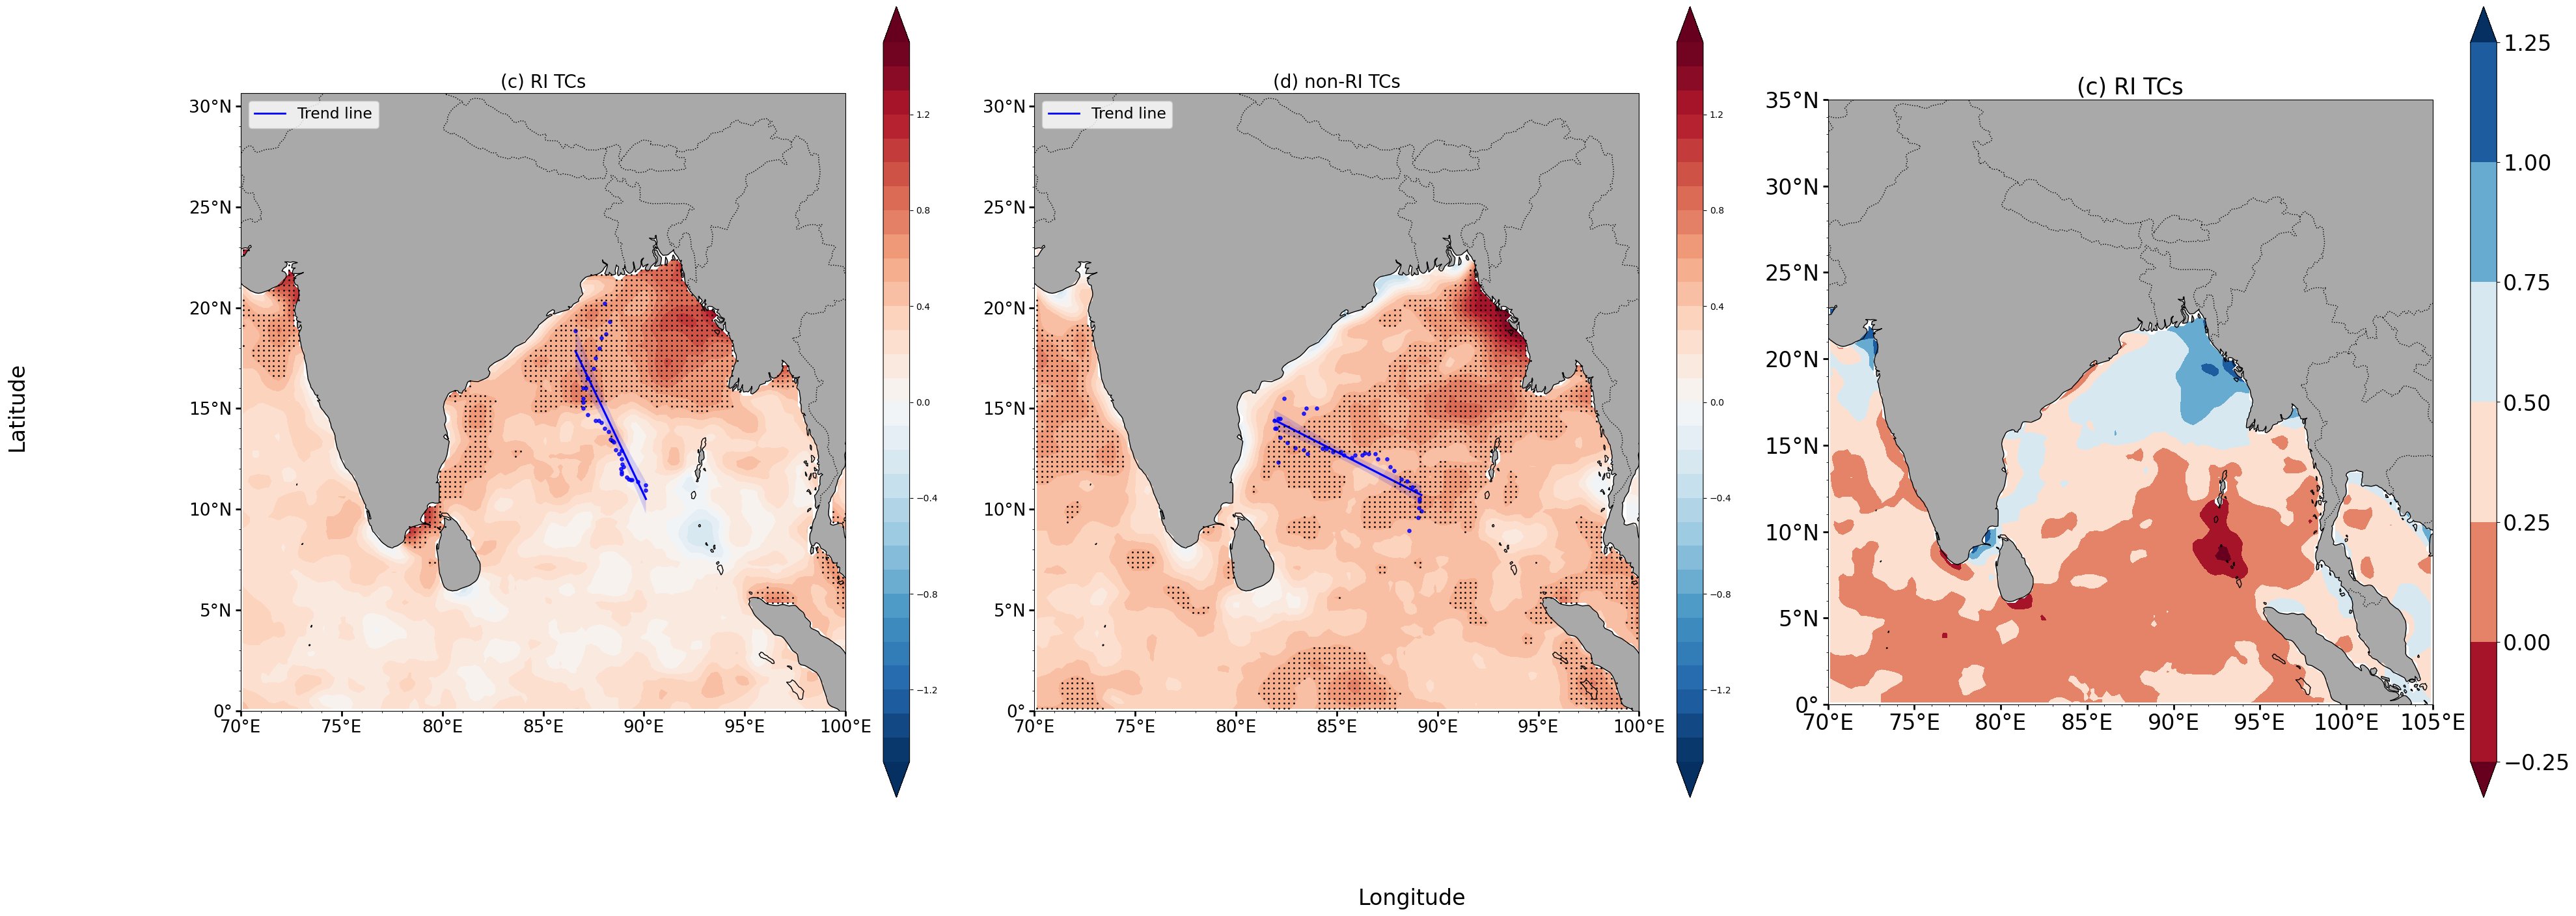

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.cm as cm
import xarray as xr
from scipy.stats import ttest_1samp
import matplotlib.ticker as ticker
import pandas as pd
import cftime
import matplotlib.gridspec as gridspec
import seaborn as sns
# Define the coordinates of the Bay of Bengal region
lon_min, lon_max = 70, 100
lat_min, lat_max = 0, 30
####################################################################################################################
#Premonsoon RI
# Define track data for multiple cyclones
cyclone_tracks1 = [
{
        'name': 'Fani',
        'intensification_range': (23,38),  # Add the rapid intensification range for Cyclone here
        'track': [(2.7, 89.7),(2.7, 89.7), (3.0, 89.4), (3.1, 89.3), (3.2, 89.2), (3.45, 89), (3.7, 88.8), (4.1, 88.8), (4.5, 88.8),
 (4.9, 88.7), (5.2, 88.6), (5.4, 88.5), (5.9, 88.5),(6.3, 88.5), (6.6, 88.2), (6.9, 87.9), (7.3, 87.9), 
 (7.3, 87.9), (7.4, 87.8), (7.7, 87.5), (8.2, 87.0),(8.3, 86.9), (8.4, 86.9), (8.5, 86.9), (8.6, 86.9),
 (8.7, 86.9), (9.2, 86.9), (9.7, 86.8), (10.1, 86.7), (10.4, 86.7), (10.8, 86.6), (11.1, 86.5), (11.7, 86.5),
 (12.3, 86.2), (12.6, 85.7), (13.0, 85.3), (13.3, 84.7), (13.4, 84.5), (13.5, 84.4), (13.6, 84.2), (13.9, 84.0),
 (14.1, 83.9), (14.2, 83.9), (14.5, 84.1), (14.9, 84.1), (15.1, 84.1), (15.2, 84.1), (15.5, 84.2), (15.9, 84.5),
 (16.2, 84.6), (16.7, 84.8), (17.1, 84.8), (17.5, 84.8), (17.8, 84.9), (18.2, 85.0), (18.6, 85.2), (19.1, 85.5),
 (19.6, 85.7), (20.2, 85.9), (20.6, 86.0), (21.1, 86.5), (21.5, 86.7), (21.9, 87.1), (22.5, 87.9), (23.1, 88.2),
 (23.6,  88.8), (24.3, 89.3),(24.75,90.0), (25.2, 90.7),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Amphan',
        'intensification_range': (16,29),  # Add the rapid intensification range for Cyclone here
        'track': [(10.4, 87.0), (10.7, 86.5), (10.9, 86.3), (10.9, 86.3), (10.9, 86.3), (11.0, 86.2), (11.1, 86.1), (11.3, 86.1), 
 (11.4, 86.0), (11.4, 86.0), (11.5, 86.0), (11.7, 86.0), (12.0, 86.0), (12.8, 86.2), (12.5, 86.1), (12.9, 86.4), 
 (13.2, 86.3), (13.3, 86.2), (13.4, 86.2), (13.7, 86.2), (14.0, 86.3), (14.5, 86.4), (14.9, 86.5), (15.2, 86.6), 
 (15.6, 86.7), (16.0, 86.8), (16.5, 86.9), (17.0, 86.9), (17.4, 87.0), (18.1, 87.1), (18.4, 87.2), (18.7, 87.2), 
 (19.1, 87.5), (19.8, 87.7), (20.6, 88.0), (21.4, 88.1), (21.9, 88.4), (22.7, 88.6), (23.3, 89.0), (24.2, 89.0), 
 (24.2, 89.3), (24.7, 89.5), (25.0, 89.6), (25.2,89.6), (25.4, 89.6),] # Add the track data for Cyclone here
       
    },    
{
        'name': 'Mocha',
        'intensification_range': (10,34),  # Add the rapid intensification range for Cyclone here
        'track': [(8.3, 89.5),(8.4,89.4), (8.5, 89.3),(8.5,89.15), (8.5, 89.0), (8.8, 88.9), (9.1, 88.7),(9.55,88.55), (10.0, 88.4),(10.4,88.3), (10.8, 88.2),(11,88.15), (11.2, 88.1),
 (11.4, 88.0), (11.6, 88.0), (11.8, 88.0), (12.2, 88.0), (12.5, 88.1), (12.7, 88.1), (12.9, 88.1), (13.2, 88.1),
 (13.6, 88.2), (14.0, 88.3), (14.3, 88.4), (14.6, 88.6), (14.8, 88.7), (15.1, 88.8), (15.2, 88.9), (15.4, 89.1),
 (15.7, 89.5), (16.0, 90.0), (16.4, 90.3), (16.9, 90.8), (17.4, 90.9), (17.9, 91.0), (18.3, 91.3), (18.7, 91.5),
 (19.3, 91.9), (19.9, 92.5), (20.5, 92.9), (21.1, 93.3), (21.8, 93.8), (22.7, 94.6), (23.5, 95.3), (23.9, 97.8),
 ] # Add the track data for Cyclone here
       
    }, 
{
        'name': 'Mala',
        'intensification_range': (17,32),  # Add the rapid intensification range for Cyclone here
        'track': [(9.5, 90.5), (9.5, 90.5), (9.5, 90.0), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.5, 89.0), (10.5, 89.0),
 (11.0, 89.0), (11.0, 89.5), (11.5, 90.0), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.5, 90.5), (12.5, 90.5),
 (12.5, 90.5), (13.0, 90.5), (13.0, 90.5), (13.0, 90.5), (13.5, 90.5), (14.0, 91.0), (14.5, 91.5), (15.0, 92.0), (15.3, 92.3), 
 (15.5, 92.5), (16.0, 93.0), (16.0, 93.0), (16.5, 93.5), (16.5, 93.5), (17.0, 94.0), (17.5, 94.5), (18.0, 95.0), (18.5, 95.5),
 (18.5, 95.5), (19.0, 96.0),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Nargis',
        'intensification_range':  (2,10),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0, 87.0), (12.0, 87.0), (12.0, 86.5), (12.0, 86.5), (12.0, 86.5), (12.5, 86.0), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5),
        (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.5, 85.5), (13.5, 85.5), 
        (13.5, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 86.0), (14.0, 86.0), (14.5, 86.5), (14.5, 86.5), (14.5, 87.0), 
        (14.5, 87.0), (15.0, 87.5), (15.0, 87.5), (15.0, 87.5), (15.5, 88.0), (15.5, 89.0), (16.0, 89.5), (16.0, 90.0), (16.0, 90.5), 
        (16.0, 91.0), (16.0, 91.5), (16.0, 92.0), (16.0, 92.5), (16.0, 93.0), (16.0, 93.5), (16.0, 94.0), (16.0, 94.3), (16.0, 95.0), 
        (16.5, 95.5), (16.5, 95.5), (16.5, 95.5), (17.0, 96.0), (17.5, 96.5), (18.0, 97.0),]
     
   },
{
        'name': 'Giri',
        'intensification_range': (0,16),  # Add the rapid intensification range for Cyclone here
        'track': [(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(18.0,92),(18.0,92),
 (18.0,92.0),(18.5,92.5),(18.5,92.5),(19.0,93),(19.0,93),(19.5,93.5),(19.8,93.5),(20.0,93.5),
 (20.5,94),(20.5,94),(21.0,94.5),(21.5,95),(22.0,95.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Phailin',
        'intensification_range': (9,28),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0,96.0),(12.0,95.5),(12.0,95),(12.0,94.5),(12.25,94.25),(12.5,94.0),(13.0,93.5),(13.0,93.5),(13.0,93.0),(13.5,92.5),
 (13.5,92.5),(13.6,92.5),(14.0,92.0),(14.0,92.0),(14.5,91.5),(14.5,91.0),(15.0,90.5),(15.0,90.5),
 (15.5,90.0),(15.5,90.0),(15.5,89.5),(15.5,89.0),(16.0,88.5),(16.0,88.5),(16.2,88.3),(16.5,88.0),
 (16.8,87.7),(16.9,87.2),(17.0,87.0),(17.1,86.8),(17.5,86.5),(17.8,86.0),(18.1,85.7),(18.6,85.4),
 (18.7,85.2),(19.1,85.2),(19.5,84.8),(20.0,84.5),(20.5,84.5),(21.0,84.0),(21.5,84.0),(21.8,83.8),
 (22.5,83.8),(22.75,83.65),(23.0,83.5),(23.25,83.75),(23.5,84.0),(24.0,84.1),(24.5,84.2),]  # Add the track data for Cyclone 
       
    },
{
        'name': 'Madi',
        'intensification_range': (0,13),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0,84.0),(10.0,84.0),(10.1,84.0),(10.2,84.0),(10.3,84.0),(10.4,84.0),(10.45,84.05),(10.5,84.1),(10.5,84.1),(10.7,84.2),(10.8,84.3),
 (11.0,84.4),(11.0,84.5),(11.2,84.5),(11.5,84.6),(11.8,84.6),(12.0,84.6),(12.3,84.7),(12.6,84.7),
 (13.0,84.7),(13.2,84.7),(13.4,84.7),(13.6,84.7),(13.8,84.7),(14.0,84.7),(14.3,84.7),(14.4,84.7),
 (14.6,84.7),(14.7,84.7),(14.8,84.8),(14.8,84.8),(15.0,85.0),(15.3,85.3),(15.4,85.3),(15.7,85.3),
 (15.4,85.0),(15.1,84.8),(14.9,84.7),(14.6,84.6),(14.3,84.2),(14.0,83.8),(13.7,83.5),(13.5,83.4),
 (13.3,83.3),(13.1,83.5),(12.9,82.7),(12.7,82.35),(12.5,82.0),(12.0,81.5),(11.5,81.2),(11.0,80.7),(10.5,80.0),(10.25,78.9),
 (10.0,78.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Hudhud',
        'intensification_range': (33,42),  # Add the rapid intensification range for Cyclone here
        'track': [(11.5, 95.0), (11.7, 94.8), (11.85,94.4),(12.0, 94.0), (12.0,93.75),(12.0, 93.5),(12.1,93.25), (12.2, 93.0), (12.3, 92.9), (12.5, 92.5), (12.7, 91.7),
 (12.8, 91.0), (13.0, 90.5), (13.2, 90.2), (13.5, 89.6), (13.7, 89.2), (13.8, 89.0), (13.9, 88.8), (14.6, 88.6),
 (14.1, 88.4), (14.1, 88.1), (14.1, 87.9), (14.3, 87.7), (14.4, 87.6), (14.7, 87.2), (14.8, 87.0), (15.0, 86.8),
 (15.2, 86.7), (15.4, 86.5), (15.5, 86.4), (15.7, 86.1), (15.9, 85.7), (16.0, 85.4), (16.1, 85.1), (16.1, 85.0),
 (16.2, 84.8), (16.2, 84.8), (16.4, 84.7), (16.7, 84.4), (17.2, 84.2), (17.4, 83.8), (17.6, 83.4), (17.8, 83.0),
 (18.0, 82.7), (18.3, 82.5), (18.7, 82.3), (18.7, 82.3), (19.5, 81.5), (20.5, 81.5), (20.7, 81.5),(21.0,81.5), (21.3, 81.5),(21.8,81.5),
 (22.3, 81.5),(23.55,81.5), (24.8, 81.5), (25.1, 81.6), (25.6, 81.7), (26.3, 81.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Titli',
        'intensification_range': (8,23),  # Add the rapid intensification range for Cyclone here
        'track': [(14.0, 88.8), (14.0, 88.8),(14.15,88.5), (14.3, 88.2),(14.4,87.9), (14.5, 87.6),(14.6,87.35), (14.7, 87.1), (14.7, 86.9), (14.8, 86.7), (14.9, 86.6),
 (15.1, 86.4), (15.3, 86.2), (15.5, 86.0), (15.7, 85.8), (16.0, 85.8), (16.5, 85.8), (17.0, 85.6), (17.3, 85.4),
 (17.5, 85.3), (17.7, 85.2), (18.2, 85.1), (18.6, 84.7), (18.8, 84.4), (19.0, 84.1), (19.3, 83.8), (19.6, 83.8), 
 (19.9, 83.7), (20.1, 84.0), (20.3, 84.3),(20.4,84.5), (20.5, 84.7), (20.6, 84.9), (20.8, 85.2), (20.9, 85.5), (21.2, 86.1), (21.55,86.65),
 (21.9, 87.2), (22.1, 87.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Bulbul',
        'intensification_range': (6,18),  # Add the rapid intensification range for Cyclone here
        'track': [(13.1, 91.5), (13.1, 91.0), (13.1, 90.7),(13.15,90.4), (13.2, 90.1),(13.25,89.95), (13.3, 89.8),(13.35,89.75), (13.4, 89.7), (13.4, 89.6), (13.4, 89.4),
 (13.45,89.35),(13.5, 89.3),(13.65,89.3), (13.8, 89.3),(14.0,89.3), (14.2, 89.3), (14.7, 89.3), (15.3, 88.7), (15.5, 88.4), (15.9, 88.0), (16.2, 87.9), 
 (16.4, 87.8), (16.6, 87.7), (16.9, 87.6), (17.2, 87.6), (17.6, 87.6), (18.1, 87.6), (18.5, 87.6), (19.2, 87.7), 
 (19.3, 87.6), (19.6, 87.7), (20.0, 87.6), (20.4, 87.6), (20.6, 87.8), (20.9, 87.9), (21.2, 88.1), (21.4, 88.3), 
 (21.6, 88.6), (21.9, 89.1), (22.1, 89.5), (22.2, 89.7), (22.3, 90.0), (22.4, 90.1), (22.5, 90.4),(22.6,90.8),(22.7, 91.2), (22.9,91.55),
 (23.1, 91.9),] # Add the track data for Cyclone here
       
    },  
{
        'name': 'Sidr',
        'intensification_range':  (1,18),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0, 92.0), (10.0, 92.0), (10.0, 92.0), (10.5, 91.5), (10.5, 91.5), (10.5, 91.5), (10.5, 91.0), (11.0, 90.5), (11.0, 90.5),
      (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (12.0, 89.5), (12.0, 89.5), (12.0, 89.5), (13.0, 89.5), (13.0, 89.5),
      (13.0, 89.5), (13.5, 89.5), (14.0, 89.5), (14.5, 89.5), (14.5, 89.5), (15.0, 89.5), (15.5, 89.5), (16.0, 89.0), (16.0, 89.0), 
      (16.5, 89.0), (17.0, 89.0), (17.5, 89.0), (18.0, 89.0), (19.5, 89.0), (20.0, 89.0), (21.0, 89.0), (21.5, 89.5), (22.5, 90.5), 
      (23.5, 91.0), (23.5, 91.0), (24.5, 91.5),]
     
    },


    
    # Add more cyclone track data lists as needed
]

# Convert date strings to datetime objects
start_date_amphan = cftime.DatetimeGregorian(2020,5,18)
end_date_amphan = cftime.DatetimeGregorian(2020, 5, 19)
start_date_mocha = cftime.DatetimeGregorian(2023, 5, 11)
end_date_mocha = cftime.DatetimeGregorian(2023, 5, 12)
start_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
end_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
start_date_fani = cftime.DatetimeGregorian(2019, 4, 29)
end_date_fani = cftime.DatetimeGregorian(2019, 4, 30)
start_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
end_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
start_date_giri = cftime.DatetimeGregorian(2010,10,20)
end_date_giri= cftime.DatetimeGregorian(2010, 10, 21)
start_date_phailin = cftime.DatetimeGregorian(2013, 10, 10)
end_date_phailin = cftime.DatetimeGregorian(2013, 10, 11)
start_date_madi = cftime.DatetimeGregorian(2013, 12, 6)
end_date_madi = cftime.DatetimeGregorian(2013, 12, 7)
start_date_hudhud = cftime.DatetimeGregorian(2014, 10, 10)
end_date_hudhdud= cftime.DatetimeGregorian(2014, 10, 10)
start_date_titli = cftime.DatetimeGregorian(2018, 10, 9)
end_date_titli = cftime.DatetimeGregorian(2018, 10, 10)
start_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
end_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
start_date_sidr = cftime.DatetimeGregorian(2007, 11, 12)
end_date_sidr = cftime.DatetimeGregorian(2007, 11, 13)
# Load the SST data from the downloaded NetCDF file
sst_data = xr.open_dataset('/DISK-0/gokul/ENGY/data/sst.day.anom.2005-2023.nc')
sst_amphan = sst_data.sel(time=slice(str(start_date_amphan), str(end_date_amphan)), lat=slice(0, 35), lon=slice(70, 105))
sst_mocha = sst_data.sel(time=slice(str(start_date_mocha), str(end_date_mocha)), lat=slice(0, 35), lon=slice(70, 105))
sst_mala = sst_data.sel(time=slice(str(start_date_mala), str(end_date_mala)), lat=slice(0, 35), lon=slice(70, 105))
sst_fani = sst_data.sel(time=slice(str(start_date_fani), str(end_date_fani)), lat=slice(0, 35), lon=slice(70, 105))
sst_nargis = sst_data.sel(time=slice(str(start_date_nargis), str(end_date_nargis)), lat=slice(0, 35), lon=slice(70, 105))
sst_giri = sst_data.sel(time=slice(str(start_date_giri), str(end_date_giri)), lat=slice(0, 35), lon=slice(70, 105))
sst_phailin = sst_data.sel(time=slice(str(start_date_phailin), str(end_date_phailin)), lat=slice(0, 35), lon=slice(70, 105))
sst_madi = sst_data.sel(time=slice(str(start_date_madi), str(end_date_madi)), lat=slice(0, 35), lon=slice(70, 105))
sst_hudhud = sst_data.sel(time=slice(str(start_date_hudhud), str(end_date_hudhdud)), lat=slice(0, 35), lon=slice(70, 105))
sst_titli = sst_data.sel(time=slice(str(start_date_titli), str(end_date_titli)), lat=slice(0, 35), lon=slice(70, 105))
sst_bulbul = sst_data.sel(time=slice(str(start_date_bulbul), str(end_date_bulbul)), lat=slice(0, 35), lon=slice(70, 105))
sst_sidr = sst_data.sel(time=slice(str(start_date_sidr), str(end_date_sidr)), lat=slice(0, 35), lon=slice(70, 105))

sst_values1 = sst_amphan['anom'] 
sst_values2 = sst_mocha['anom'] 
sst_values3 = sst_mala['anom'] 
sst_values4 = sst_fani['anom'] 
sst_values5 = sst_nargis['anom'] 
sst_valuesri1 = sst_giri['anom'] 
sst_valuesri2 = sst_phailin['anom'] 
sst_valuesri3 = sst_madi['anom'] 
sst_valuesri4 = sst_hudhud['anom'] 
sst_valuesri5 = sst_titli['anom'] 
sst_valuesri6 = sst_bulbul['anom'] 
sst_valuesri7 = sst_sidr['anom'] 
sst_anom1 = np.mean(sst_values1.values, axis=0)
sst_anom2 = np.mean(sst_values2.values, axis=0)
sst_anom3 = np.mean(sst_values3.values, axis=0)
sst_anom4 = np.mean(sst_values4.values, axis=0)
sst_anom5 = np.mean(sst_values5.values, axis=0)
sst_anomri1 = np.mean(sst_valuesri1.values, axis=0)
sst_anomri2 = np.mean(sst_valuesri2.values, axis=0)
sst_anomri3 = np.mean(sst_valuesri3.values, axis=0)
sst_anomri4 = np.mean(sst_valuesri4.values, axis=0)
sst_anomri5 = np.mean(sst_valuesri5.values, axis=0)
sst_anomri6 = np.mean(sst_valuesri6.values, axis=0)
sst_anomri7 = np.mean(sst_valuesri7.values, axis=0)

sst_anomaly1 = np.mean([sst_anom1, sst_anom2, sst_anom3, sst_anom4, sst_anom5,sst_anomri1,sst_anomri2,sst_anomri3,sst_anomri4,sst_anomri5,sst_anomri6,sst_anomri7], axis=0)

print(sst_anomaly1)


################################################################################################################
# Premonsoon Non-RI
# Define track data for multiple cyclones
cyclone_tracks2 = [
{
        'name': 'Asani',
        'track': [(9.4, 91.3),(9.85,90.85), (10.3, 90.4),(10.55,90.25), (10.8, 90.1),(11.05,89.7), (11.3, 89.3), (11.5, 89.0),
         (11.8, 88.7), (12.0, 88.4), (12.3, 88.2), (12.7, 87.8), (13.1, 87.5), (13.5, 87.1), (13.9, 86.8),
         (14.2, 86.5), (14.6, 86.3), (14.7, 86.0), (14.9, 85.8), (15.0, 85.5), (15.1, 85.2), (15.2, 84.9),
         (15.3, 84.6), (15.4, 84.0), (15.5, 83.5), (15.6, 83.1), (15.7, 82.8), (15.8, 82.4), (15.9, 82.1),
         (16.0, 81.9), (16.1, 81.8), (16.1, 81.6), (16.2, 81.5), (16.2, 81.4), (16.3, 81.4), (16.3, 81.3),
         (16.3, 81.2),(16.25,81.05), (16.2, 80.9),]
    },
{
        'name': 'Yaas',
        'track': [(16.1, 90.2),(16.15,90.05), (16.2, 89.9),(16.25,89.8), (16.3, 89.7), (16.3, 89.7), (16.3, 89.7), 
      (16.5, 89.6), (16.4, 89.6), (16.8, 89.5), (17.1, 89.3), (17.4, 89.2), (17.6, 89.0), (17.8, 88.9),
      (18.0, 88.6), (18.3, 88.3), (18.7, 88.0), (19.1, 88.1), (19.5, 88.0), (19.8, 87.9), (20.1, 87.8), 
      (20.4, 87.6), (20.8, 87.3), (21.2, 87.1), (21.4, 86.9), (21.6, 86.7), (21.8, 86.6), (22.2, 86.2), 
      (22.5, 86.0),(22.65,85.9), (22.8, 85.8), (23.1, 85.7), (23.5, 85.6),(23.9,85.45), (24.3, 85.3),(24.45,85.05), 
      (24.7, 84.8),]
       
    },
{
        'name': 'Mora',
        'track': [(14.0, 88.5), (14.5, 89.5), (15.0, 90.0), (15.4, 90.5), (15.7, 90.7), (16.0, 91.0), (16.3, 91.2),
      (16.6, 91.3), (17.0, 91.3), (17.3, 91.3), (17.8, 91.4), (18.3, 91.5), (18.6, 91.5), (18.8, 91.5), 
      (20.0, 91.6), (20.3, 91.6), (21.1, 91.8), (21.8, 91.9), (22.8, 91.9), (23.6, 92.1), (24.2, 92.2), 
      (24.75,92.3), (25.3, 92.4),]
    },

{
        'name': 'Laila',
        'track': [(10.5,88.5),(10.75,88.25),(11.0,88.0),(11.25,87.75),(11.5,87.5),(11.5,87),(11.5,86.5),(12.0,85.5),(12.5,84.5),(13.0,84.0),(13.0,83.5),
       (13.0,83.0),(13.0,82.5),(13.0,82.0),(13.5,82.0),(13.5,82.0),(13.5,81.5),(14.0,81.5),(14.0,81.5),
       (14.0,81.5),(14.5,81.0),(14.5,81.0),(15.0,81.0),(15.5,80.5),(15.7,80.5),(15.8,80.5),(16.0,80.5),
       (16.0,80.5),(16.0,80.5),(16.0,80.7),(16.2,80.8),(16.5,81.0),(17.0, 81.5),]
     
   },
{
        'name': 'Aila',
        'track': [(16.5, 88.0), (16.5, 88.0), (16.5, 88.0), (16.75, 88.25), (17.0, 88.5), (17.0, 88.5), (17.0, 88.5),
      (18.0, 88.5), (18.0, 88.5), (18.0, 88.5), (18.5, 88.5), (19.0, 88.5), (19.0, 88.5), (20.0, 88.0), 
      (20.0, 88.0), (20.5, 88.0), (21.5, 88.0), (22.0, 88.0), (22.5, 88.0), (23.0, 88.0), (23.5, 88.0), 
      (24.0, 88.0), (25.0, 88.0), (25.5, 88.0), (27.0, 88.5),]

     
   },
{
        'name': 'Mandous',
        'track': [(8.2, 88.2),(8.3,87.6), (8.4, 87.0), (8.6, 86.3), (8.7, 85.7), (8.7, 85.5),(8.8,85.25),
           (8.9, 85.0),(9.05,84.8), (9.2, 84.6), (9.3, 84.4), (9.4, 84.1), (9.5, 83.8), (9.7, 83.5),
           (9.8, 83.2), (10.1, 82.9), (10.4, 82.6), (10.6, 82.3), (10.7, 82.0), (11.0, 81.7), (11.1, 81.5),
           (11.4, 81.3), (11.7, 81.0), (12.0, 80.8), (12.2, 80.6), (12.5, 80.3), (12.8, 80.0), (12.9, 79.7),
           (12.8, 79.5), (12.7, 79.3),]
    },
{
        'name': 'Nivar',
        'track': [(8.5, 85.3), (9.3, 84.5), (9.5, 84.2), (9.6, 84.0),(9.7,83.8), (9.8, 83.6),(9.9,83.45), (10.0, 83.3),
       (10.0,83.15), (10.0, 83.0), (10.0, 83.0), (10.0, 82.7), (10.0, 82.6), (10.1, 82.5), (10.1, 82.4), (10.2, 82.3),
       (10.3, 82.2), (10.5, 82.0), (10.7, 81.7), (11.0, 81.3), (11.2, 81.0), (11.4, 80.7), (11.7, 80.4),
       (12.0, 80.1), (12.1, 79.9), (12.3, 79.7), (12.6, 79.4), (12.9, 79.3), (13.3, 79.3), (13.6, 79.4), 
       (13.8,79.5), (14.0, 79.6),]
       
    },
{
        'name': 'Phethai',
        'track': [(6.5, 88.7), (6.7, 88.6), (6.8, 88.5),(7.05,88.35), (7.3, 88.2), (7.45,88.1), (7.6, 88.0),(7.9,87.8), (8.2, 87.6), (8.5, 87.4), (8.5, 87.4),(8.55,87.1),
        (8.6, 86.8), (8.7,86.5), (8.8, 86.2), (8.9,85.75), (9.0, 85.5), (9.2, 85.2), (9.4, 85.1), (9.85,85), (10.3, 84.9), (10.7, 84.7), (11.0, 84.6), (11.1, 84.5), (11.3, 84.3), 
        (11.8, 84.1), (12.2, 83.9), (12.6,83.6), (13.3, 83.0), (13.8, 82.7), (14.0, 82.5), (14.5, 82.2), (15.2, 82.2), (15.8, 82.2), (16.2, 82.2), 
        (16.7, 82.3), (16.9, 82.4), (17.3, 82.5), (17.5, 82.5),]
       
    },
{
        'name': 'Gaja',
        'track':[(11.7, 92.5), (12.0, 92.0), (12.3,92.4), (12.6, 90.8), (12.8,93.5), (13.0, 89.9), (13.2,89.6), (13.4, 89.3), (13.5, 88.9),
      (13.5, 88.5), (13.5, 88.2), (13.5, 88.0), (13.5, 87.7), (13.4, 87.4), (13.5, 87.2), (13.3, 87.1), (13.1, 87.0),
      (12.9, 86.9), (12.9, 86.9), (12.6, 87.3), (12.9, 87.5), (13.2, 87.5), (13.2, 87.3), (13.2, 87.2), (13.3, 87.1), 
      (13.5, 86.6), (13.4, 86.4), (13.4, 86.0), (13.2, 85.8), (13.2, 85.6), (13.1, 85.5), (13.1, 85.3), (13.0, 85.1), 
      (12.8, 84.8), (12.6, 84.6), (12.4, 84.2), (12.2, 84.2), (12.0, 83.8), (11.8, 83.4), (11.5, 83.2), (11.3, 82.6),
      (11.2, 82.0), (11.0, 81.5), (10.8, 81.2), (10.6, 80.7), (10.5, 80.3), (10.4, 79.7), (10.4, 79.2), (10.4, 78.5), 
      (10.5, 77.6), (10.3,77), (10.1, 76.4), (10,75.85), (9.9, 75.3), (9.85,74.8), (9.8, 74.3), (9.8, 73.7), (9.8, 73.2),
      (9.85,72.45), (9.9, 71.7), (10,71.1), (10.1, 70.5), (10.2,70.05), (10.3, 69.6), (10.4, 69.4), (10.5, 69.0), (10.6,68.75),(10.7, 68.5),
      (10.75,68), (10.8, 67.5),(10.9,67.05), (11.0, 66.6), (11.1, 66.3), (11.2, 65.8), (11.2, 65.4), (11.2, 65.0),]

       
    },
{
        'name': 'Vardah',
        'track': [(8.5, 91.0), (8.5, 90.5), (9,90.5), (9.5, 90.5), (9.65,90.5), (9.8, 90.5), 
        (9.8, 90.5), (9.8, 90.5), (9.9,90.5), (10.0, 90.5), (10.4,90.5), (10.8, 90.5),
        (11,90.5), (11.2, 90.5), (11.5, 90.5), (11.5, 90.5), (11.5, 90.5), (11.7, 90.5),
        (11.7, 90.5), (11.8, 90.5), (12.0, 90.5), (12.0, 90.4), (12.1, 90.4), (12.1, 90.3),
        (12.2, 90.3), (12.2, 90.0), (12.2, 89.9), (12.3, 89.6), (12.5, 89.0), (12.6, 88.4),
        (12.7, 88.0), (13.0, 87.4), (13.1, 86.8), (13.2, 86.4), (13.3, 85.9), (13.3, 85.3), 
        (13.3, 85.0), (13.3, 84.7), (13.1, 84.3), (13.1, 83.7), (13.1, 83.3), (13.3, 83.0), 
        (13.3, 82.5), (13.1, 82.3), (13.2, 81.9), (13.2, 81.6), (13.2, 81.2), (13.2, 80.7), 
        (13.1, 80.3), (13.0, 79.9), (12.9, 79.5), (12.7, 79.1), (12.6,78.55), (12.5, 78.0),]

       
    },    
{
        'name': 'Lehar',
        'track':[(8.5,96.5),(8.75,96.25) ,(9.0,96.0),(9.5,95.5), (10.0,95.0),(10.0,95.0),(10.5,94.5),(10.7,94.0),(11.0,93.5),(11.0,93.5),
       (11.5,93.0),(11.5,92.5),(12.0,92.5),(12.0,92),(12.0,91.5),(12.0,91.5),(12.5,91.5),(12.5,91.0),(12.5,91.0),
       (12.5,91.0),(12.5,90.5),(12.5,90.0),(12.5,89.5),(13.0,89.0),(13.0,88.5),(13.0,88.5),(13.1,88.0),
       (13.2,87.5),(13.5,87.0),(13.5,86.5),(14.0,86.0),(14.0,85.5),(14.5,85.0),(14.5,84.5),(15.0,84.0),
       (15.0,83.5),(15.5,82.0),(15.7,81.7),(15.7,81.3),(15.9,81.0),(16.0,80.8),]
       
    }, 
{
        'name': 'Helen',
        'track': [(14.5, 86.5), (14.5, 86.0), (14.5, 85.5), (14.75, 85.25), (15.0, 85.0), (15.0, 85.0), (15.0, 84.5),
       (15.0, 84.25), (15.0, 84.0), (15.0, 84.0), (15.2, 84.0), (15.2, 84.0), (15.3, 83.9), (15.3, 83.9),
       (15.4, 83.7), (15.5, 83.6), (15.6, 83.5), (15.8, 83.4), (15.9, 83.3), (16.0, 83.1), (16.1, 82.9),
       (16.1, 82.7), (16.2, 82.7), (16.2, 82.3), (16.2, 81.9), (16.2, 81.7), (16.2, 81.3), (16.1, 81.2),
       (15.9, 80.7), (15.9, 80.55),(15.9, 80.4),]
    },
{
        'name': 'Thane',
        'track':[(8.5,88.5), (8.75,88.25), (09.0,88.0),(9.25,87.75),(09.5,87.5),(09.5,87.5), (10.0,87.5),(10.25,87.5),
       (10.5,87.5),(10.75, 87.5), (11.0,87.5),(11.0,87.5),(11.5,87.5),(12.0,87.0),(12.0,87.0),(12.2,86.7),(12.5,86.5),
       (12.5,86.5),(12.5,86.0),(12.5,86.0),(12.5,85.5),(12.5,85.5),(12.5,85.0),(12.5,85.0),(12.5,84.5),
       (12.5,84.0),(12.5,84.0),(12.5,83.5),(12.3,83.0),(12.0,82.5),(12.0,82.0),(12.0,81.7),(12.0,81.3),
       (12.0, 81.0),(11.8,80.6), (11.8, 80.3), (11.6, 79.9), (11.6, 79.5), (11.6 ,79.0), (11.6, 78.6), 
       (11.6, 78.2),]
     
    },
{
        'name': 'Jal',
        'track': [(8.0,92.0),(8.5,91.0),(8.5,90.5),(8.5,90.25),(8.5,90.0),(8.5,89.75),(8.5,89.5),(8.75,89),(9.0,88.5),(9.0,88.0), (9.0,87.5),(9.0,87.5),
     (9.5,87.0),(9.5,87.0),(10.0,86.5),(10.0,86.0),(10.0,85.5),(10.0,85.5),(10.0,85.0),(10.0,85.0),
     (11.0,84.5),(11.0,84.5),(11.0,84.0),(11.0,84.0),(11.0,83.5),(12.0,83.0),(12.0,82.5),(12.0,81.5),
     (13.0,81.0),(13.0,80.5),(13.0,80.0), (13.5,79.5), (14.0,79.0),(15.0,78.0),]

     
   },

    
    # Add more cyclone track data lists as needed
]
# Convert date strings to datetime objects
start_date_asani = cftime.DatetimeGregorian(2022,5,7)
end_date_asani= cftime.DatetimeGregorian(2022, 5, 8)
start_date_yaas = cftime.DatetimeGregorian(2021, 5, 23)
end_date_yaas = cftime.DatetimeGregorian(2021, 5, 24)
start_date_mora = cftime.DatetimeGregorian(2017, 5, 28)
end_date_mora = cftime.DatetimeGregorian(2017, 5, 29)
start_date_laila = cftime.DatetimeGregorian(2010, 5, 17)
end_date_laila = cftime.DatetimeGregorian(2010, 5, 18)
start_date_aila = cftime.DatetimeGregorian(2009, 5, 23)
end_date_aila = cftime.DatetimeGregorian(2009, 5, 24)
start_date_mandous = cftime.DatetimeGregorian(2022,12,6)
end_date_mandous = cftime.DatetimeGregorian(2022, 12, 7)
start_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
end_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
start_date_phethai = cftime.DatetimeGregorian(2018, 12, 14)
end_date_phethai = cftime.DatetimeGregorian(2018, 12, 15)
start_date_gaja = cftime.DatetimeGregorian(2018,11, 11)
end_date_gaja = cftime.DatetimeGregorian(2018,11, 12)
start_date_vardah = cftime.DatetimeGregorian(2016, 12, 10)
end_date_vardah = cftime.DatetimeGregorian(2016, 12, 11)
start_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
end_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
start_date_helen = cftime.DatetimeGregorian(2013, 11, 19)
end_date_helen = cftime.DatetimeGregorian(2013, 11, 20)
start_date_thane = cftime.DatetimeGregorian(2011, 12, 26)
end_date_thane = cftime.DatetimeGregorian(2011, 12, 27)
start_date_jal = cftime.DatetimeGregorian(2010, 11, 5)
end_date_jal = cftime.DatetimeGregorian(2010, 11, 6)
# Load the SST data from the downloaded NetCDF file
sst_data = xr.open_dataset('/DISK-0/gokul/ENGY/data/sst.day.anom.2005-2023.nc')
sst_asani = sst_data.sel(time=slice(str(start_date_asani), str(end_date_asani)), lat=slice(0, 35), lon=slice(70, 105))
sst_yaas = sst_data.sel(time=slice(str(start_date_yaas), str(end_date_yaas)), lat=slice(0, 35), lon=slice(70, 105))
sst_mora = sst_data.sel(time=slice(str(start_date_mora), str(end_date_mora)), lat=slice(0, 35), lon=slice(70, 105))
sst_laila = sst_data.sel(time=slice(str(start_date_laila), str(end_date_laila)), lat=slice(0, 35), lon=slice(70, 105))
sst_aila = sst_data.sel(time=slice(str(start_date_aila), str(end_date_aila)), lat=slice(0, 35), lon=slice(70, 105))
sst_mandous = sst_data.sel(time=slice(str(start_date_mandous), str(end_date_mandous)), lat=slice(0, 35), lon=slice(70, 105))
sst_nivar= sst_data.sel(time=slice(str(start_date_nivar), str(end_date_nivar)), lat=slice(0, 35), lon=slice(70, 105))
sst_phethai = sst_data.sel(time=slice(str(start_date_phethai), str(end_date_phethai)), lat=slice(0, 35), lon=slice(70, 105))
sst_gaja = sst_data.sel(time=slice(str(start_date_gaja), str(end_date_gaja)), lat=slice(0, 35), lon=slice(70, 105))
sst_vardah = sst_data.sel(time=slice(str(start_date_vardah), str(end_date_vardah)), lat=slice(0, 35), lon=slice(70, 105))
sst_lehar = sst_data.sel(time=slice(str(start_date_lehar), str(end_date_lehar)), lat=slice(0, 35), lon=slice(70, 105))
sst_helen = sst_data.sel(time=slice(str(start_date_helen), str(end_date_helen)), lat=slice(0, 35), lon=slice(70, 105))
sst_thane = sst_data.sel(time=slice(str(start_date_thane), str(end_date_thane)), lat=slice(0, 35), lon=slice(70, 105))
sst_jal = sst_data.sel(time=slice(str(start_date_jal), str(end_date_jal)), lat=slice(0, 35), lon=slice(70, 105))
sst_valuesnri1 = sst_asani['anom'] 
sst_valuesnri2 = sst_yaas['anom'] 
sst_valuesnri3 = sst_mora['anom'] 
sst_valuesnri4 = sst_laila['anom'] 
sst_valuesnri5 = sst_aila['anom'] 
sst_values0nri1 = sst_mandous['anom'] 
sst_values0nri2 = sst_nivar['anom'] 
sst_values0nri3 = sst_phethai['anom'] 
sst_values0nri4 = sst_gaja['anom'] 
sst_values0nri5 = sst_vardah['anom'] 
sst_values0nri6 = sst_lehar['anom']
sst_values0nri7 = sst_helen['anom']
sst_values0nri8 = sst_thane['anom']
sst_values0nri9 = sst_jal['anom']
sst_anomnri1 = np.mean(sst_valuesnri1.values, axis=0)
sst_anomnri2 = np.mean(sst_valuesnri2.values, axis=0)
sst_anomnri3 = np.mean(sst_valuesnri3.values, axis=0)
sst_anomnri4 = np.mean(sst_valuesnri4.values, axis=0)
sst_anomnri5 = np.mean(sst_valuesnri5.values, axis=0)
sst_anom0nri1 = np.mean(sst_values0nri1.values, axis=0)
sst_anom0nri2 = np.mean(sst_values0nri2.values, axis=0)
sst_anom0nri3 = np.mean(sst_values0nri3.values, axis=0)
sst_anom0nri4 = np.mean(sst_values0nri4.values, axis=0)
sst_anom0nri5 = np.mean(sst_values0nri5.values, axis=0)
sst_anom0nri6 = np.mean(sst_values0nri6.values, axis=0)
sst_anom0nri7 = np.mean(sst_values0nri7.values, axis=0)
sst_anom0nri8 = np.mean(sst_values0nri8.values, axis=0)
sst_anom0nri9 = np.mean(sst_values0nri9.values, axis=0)

sst_anomaly2 = np.mean([sst_anomnri1, sst_anomnri2, sst_anomnri3, sst_anomnri4, sst_anomnri5,sst_anom0nri1,sst_anom0nri2,sst_anom0nri3,
                        sst_anom0nri4,sst_anom0nri5,sst_anom0nri6,sst_anom0nri7,sst_anom0nri8,sst_anom0nri9], axis=0)


print(sst_anomaly2)



fig = plt.figure(figsize=(45, 15))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.05)
####################################################################################################################################
# Subplot 1: Cyclone Tracks and SST Anomaly
ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max])
ax1.add_feature(cfeature.LAND, facecolor='darkgrey')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for cyclone plotting and SST anomaly
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
levels = np.linspace(-1.5, 1.5, 31) 
sst_contour1 = ax1.contourf(lon, lat, sst_anomaly1, transform=ccrs.PlateCarree(), cmap='RdBu_r',levels=levels,extend='both')
# Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks1]
print(num_timesteps_list)
# Calculate the average number of timesteps
average_num_timesteps = np.mean(num_timesteps_list)
print(average_num_timesteps)
# Calculate the average number of timesteps
average_num_timesteps = int(40)
print(average_num_timesteps)
# List to store mean track data
mean_track_data = []
for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks1:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.median(latitudes)
    mean_longitude = np.median(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)
   # Perform linear fit
x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# Convert mean track data to DataFrame
mean_track_df = pd.DataFrame({'Longitude': lons, 'Latitude': lats})

# Plot regplot with confidence interval
sns.regplot(x=x, y=y, data=mean_track_df, color='blue', ci=95,scatter_kws={'s': 14})
# Legend handles for custom legend entries
ri_line = mlines.Line2D([], [], color='red', linewidth=2, label='RI Phase')
#track_line = Line2D([0], [0], color=cm.viridis(0.7), linewidth=2, label='Evolutionary Track of TC')
genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
trend_line = mlines.Line2D([], [], color='blue', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax1.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax1.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax1.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax1.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax1.set_title('(c) RI TCs', fontsize=20)
from scipy.stats import ttest_1samp
import numpy as np

# Assuming sst_anomaly1 is your data array
sample_mean = np.mean(sst_anomaly1)  # Calculate sample mean
pop_mean = 0  # Assumed population mean for the test

# Perform one-sample t-test
tstat, pval = ttest_1samp(sst_anomaly1, pop_mean)

# Create a mask for areas of significance (assuming alpha level of 0.05)
hatch = np.where(pval < 0.05, np.nan, 0)

# Add a colorbar for the first subplot
cbar1 = plt.colorbar(sst_contour1, ax=ax1, orientation='vertical', pad=0.05, aspect=30)
#cbar1.set_label('SST Anomaly (°C)', fontsize=12)
cbar1.ax.tick_params(labelsize=10)
#########################################################################################################################################
# Subplot 2: Mean Track Data
ax2 = plt.subplot(gs[1], projection=ccrs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max])
ax2.add_feature(cfeature.LAND, facecolor='darkgrey')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for mean track plotting
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
levels = np.linspace(-1.5, 1.5, 31) 
sst_contour2 = ax2.contourf(lon, lat, sst_anomaly2, transform=ccrs.PlateCarree(), cmap='RdBu_r',levels=levels,extend='both')

 # Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks2]
print(num_timesteps_list)

# Calculate the average number of timesteps
average_num_timesteps = np.mean(num_timesteps_list)
print(average_num_timesteps)


# Calculate the average number of timesteps
average_num_timesteps = int(40)
print(average_num_timesteps)

# List to store mean track data
mean_track_data = []

for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks2:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.median(latitudes)
    mean_longitude = np.median(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)

   # Perform linear fit
x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# Plot linear fit line
#ax2.plot(x, m*x + c, color='blue', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())

# Convert mean track data to DataFrame
mean_track_df = pd.DataFrame({'Longitude': lons, 'Latitude': lats})

# Plot regplot with confidence interval
sns.regplot(x=x, y=y, data=mean_track_df, color='blue', ci=95,scatter_kws={'s': 14})

genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
trend_line = mlines.Line2D([], [], color='blue', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax2.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax2.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax2.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter) 
ax2.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax2.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax2.set_title('(d) non-RI TCs', fontsize=20) 
# Define the coordinates of the Bay of Bengal boxes
bbox1 = [80, 88, 5, 15]  # [lon_min, lon_max, lat_min, lat_max]
bbox2 = [88, 98, 5, 20]
bbox3 = [90, 100, 15, 25]
bbox4 = [80, 90, 15, 25]
# Add a colorbar for the second subplot
cbar2 = plt.colorbar(sst_contour2, ax=ax2, orientation='vertical',  pad=0.05, aspect=30)
#cbar2.set_label('SST Anomaly (°C)', fontsize=12)
cbar2.ax.tick_params(labelsize=10)
####################################################################################################################################################
ax3 = plt.subplot(gs[2], projection=ccrs.PlateCarree())
ax3.set_extent([70, 105, 0, 35], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, facecolor='darkgrey')
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
levels = np.linspace(-8,8, 15) 
slhf_contour3 = ax3.contourf(lon, lat,sst_anomaly1 , transform=ccrs.PlateCarree(), cmap='RdBu',extend='both')


lon, lat = np.meshgrid(lons, lats)
ax3.set_xticks(range(70, 105 + 1, 5), crs=ccrs.PlateCarree())
ax3.set_yticks(range(0, 35 + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.tick_params(axis='x', labelsize=24)  # Adjust font size for x-axis tick labels
ax3.tick_params(axis='y', labelsize=24)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax3.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax3.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax3.set_title('(c) RI TCs', fontsize=25)
# Add a quiver key to denote the vector scale
#ax.quiverkey(q, 0.9, 0.1, 10, '10 m/s', labelpos='E', coordinates='figure')
# Add the color bar
cbar3 = plt.colorbar(slhf_contour3, ax=ax3, orientation='vertical', pad=0.05, aspect=30)
#cbar3.set_label('Mean Shear Magnitude (m/s)', fontsize=24)
cbar3.ax.tick_params(labelsize=24)





##################################################################################################################################################### 
# Common x and y labels
fig.text(0.5, 0.04, 'Longitude', ha='center', fontsize=24)
fig.text(0.02, 0.55, 'Latitude', va='center', rotation='vertical', fontsize=24)
# Create a mask for regions where SST anomaly is greater than 0.8 and exclude NaN values
sst_anomaly_masked = np.ma.masked_where((sst_anomaly1 <= 0.5) | np.isnan(sst_anomaly1), sst_anomaly1)

# Plot significance dots for SST anomaly greater than 0.8
lon_mesh, lat_mesh = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
lon_masked = lon_mesh[np.where(sst_anomaly_masked.mask == False)]
lat_masked = lat_mesh[np.where(sst_anomaly_masked.mask == False)]
ax1.plot(lon_masked, lat_masked, 'ko', markersize=1, transform=ccrs.PlateCarree(), label='Significant SST Anomaly')
sst_anomaly_masked = np.ma.masked_where((sst_anomaly2 <= 0.5) | np.isnan(sst_anomaly2), sst_anomaly2)

# Plot significance dots for SST anomaly greater than 0.8
lon_mesh, lat_mesh = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
lon_masked = lon_mesh[np.where(sst_anomaly_masked.mask == False)]
lat_masked = lat_mesh[np.where(sst_anomaly_masked.mask == False)]
ax2.plot(lon_masked, lat_masked, 'ko', markersize=1, transform=ccrs.PlateCarree(), label='Significant SST Anomaly')

plt.subplots_adjust(left=0.1, right=0.9, top=.96, bottom=0.15)
plt.savefig('/DISK-0/gokul/ENGY/data/subplot/sst3.png',dpi=300)
# Show the plot
plt.show()



[[0.43125    0.39999999 0.37583332 ... 0.60583331 0.57416666 0.50833332]
 [0.40958332 0.37958332 0.35999999 ... 0.62291665 0.54499999 0.47124999]
 [0.37249999 0.35749998 0.33583333 ... 0.57041665 0.47541665 0.39999999]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[[0.5142857  0.50321428 0.51357142 ... 0.53142855 0.49107141 0.49214284]
 [0.49035713 0.48607142 0.47999999 ... 0.55285712 0.50249999 0.51642855]
 [0.47071427 0.47821428 0.47071428 ... 0.52571427 0.46964284 0.48428571]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[69, 45, 45, 38, 51, 23, 49, 54, 59, 39, 49, 39]
46.666666666666664
40
[[False False False ... False False False

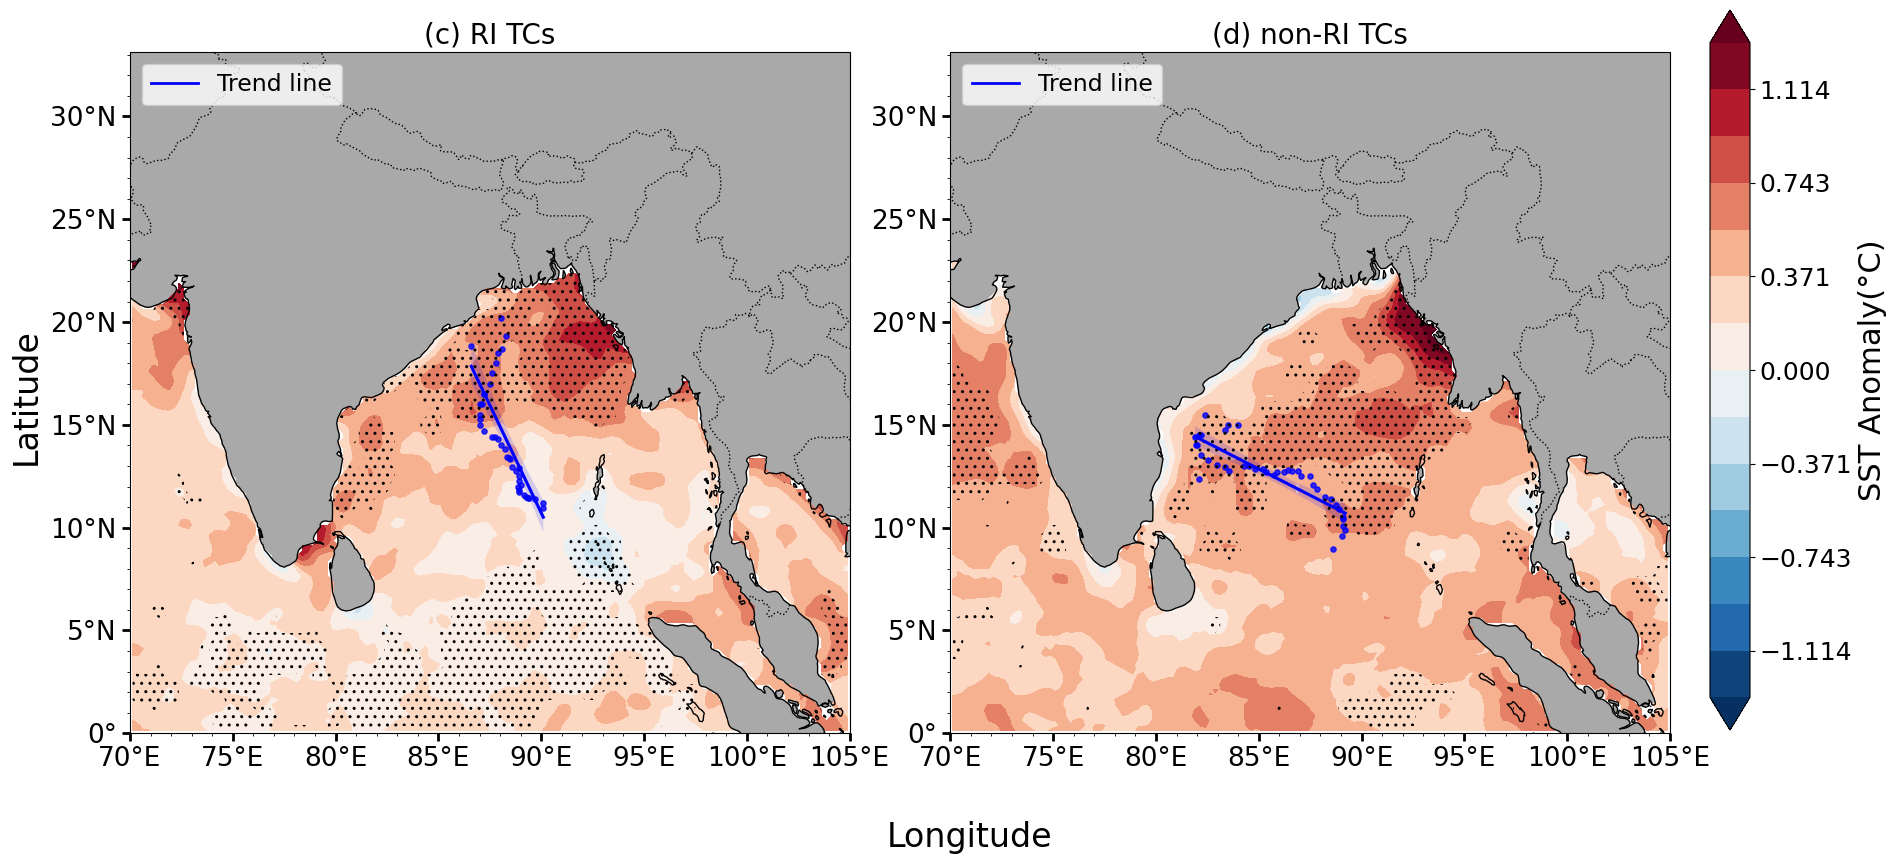

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.cm as cm
import xarray as xr
from scipy.stats import ttest_1samp
import matplotlib.ticker as ticker
import pandas as pd
import cftime
import matplotlib.gridspec as gridspec
import seaborn as sns
# Define the coordinates of the Bay of Bengal region
lon_min, lon_max = 70, 105
lat_min, lat_max = 0, 32
####################################################################################################################
#Premonsoon RI
# Define track data for multiple cyclones
cyclone_tracks1 = [
{
        'name': 'Fani',
        'intensification_range': (23,38),  # Add the rapid intensification range for Cyclone here
        'track': [(2.7, 89.7),(2.7, 89.7), (3.0, 89.4), (3.1, 89.3), (3.2, 89.2), (3.45, 89), (3.7, 88.8), (4.1, 88.8), (4.5, 88.8),
 (4.9, 88.7), (5.2, 88.6), (5.4, 88.5), (5.9, 88.5),(6.3, 88.5), (6.6, 88.2), (6.9, 87.9), (7.3, 87.9), 
 (7.3, 87.9), (7.4, 87.8), (7.7, 87.5), (8.2, 87.0),(8.3, 86.9), (8.4, 86.9), (8.5, 86.9), (8.6, 86.9),
 (8.7, 86.9), (9.2, 86.9), (9.7, 86.8), (10.1, 86.7), (10.4, 86.7), (10.8, 86.6), (11.1, 86.5), (11.7, 86.5),
 (12.3, 86.2), (12.6, 85.7), (13.0, 85.3), (13.3, 84.7), (13.4, 84.5), (13.5, 84.4), (13.6, 84.2), (13.9, 84.0),
 (14.1, 83.9), (14.2, 83.9), (14.5, 84.1), (14.9, 84.1), (15.1, 84.1), (15.2, 84.1), (15.5, 84.2), (15.9, 84.5),
 (16.2, 84.6), (16.7, 84.8), (17.1, 84.8), (17.5, 84.8), (17.8, 84.9), (18.2, 85.0), (18.6, 85.2), (19.1, 85.5),
 (19.6, 85.7), (20.2, 85.9), (20.6, 86.0), (21.1, 86.5), (21.5, 86.7), (21.9, 87.1), (22.5, 87.9), (23.1, 88.2),
 (23.6,  88.8), (24.3, 89.3),(24.75,90.0), (25.2, 90.7),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Amphan',
        'intensification_range': (16,29),  # Add the rapid intensification range for Cyclone here
        'track': [(10.4, 87.0), (10.7, 86.5), (10.9, 86.3), (10.9, 86.3), (10.9, 86.3), (11.0, 86.2), (11.1, 86.1), (11.3, 86.1), 
 (11.4, 86.0), (11.4, 86.0), (11.5, 86.0), (11.7, 86.0), (12.0, 86.0), (12.8, 86.2), (12.5, 86.1), (12.9, 86.4), 
 (13.2, 86.3), (13.3, 86.2), (13.4, 86.2), (13.7, 86.2), (14.0, 86.3), (14.5, 86.4), (14.9, 86.5), (15.2, 86.6), 
 (15.6, 86.7), (16.0, 86.8), (16.5, 86.9), (17.0, 86.9), (17.4, 87.0), (18.1, 87.1), (18.4, 87.2), (18.7, 87.2), 
 (19.1, 87.5), (19.8, 87.7), (20.6, 88.0), (21.4, 88.1), (21.9, 88.4), (22.7, 88.6), (23.3, 89.0), (24.2, 89.0), 
 (24.2, 89.3), (24.7, 89.5), (25.0, 89.6), (25.2,89.6), (25.4, 89.6),] # Add the track data for Cyclone here
       
    },    
{
        'name': 'Mocha',
        'intensification_range': (10,34),  # Add the rapid intensification range for Cyclone here
        'track': [(8.3, 89.5),(8.4,89.4), (8.5, 89.3),(8.5,89.15), (8.5, 89.0), (8.8, 88.9), (9.1, 88.7),(9.55,88.55), (10.0, 88.4),(10.4,88.3), (10.8, 88.2),(11,88.15), (11.2, 88.1),
 (11.4, 88.0), (11.6, 88.0), (11.8, 88.0), (12.2, 88.0), (12.5, 88.1), (12.7, 88.1), (12.9, 88.1), (13.2, 88.1),
 (13.6, 88.2), (14.0, 88.3), (14.3, 88.4), (14.6, 88.6), (14.8, 88.7), (15.1, 88.8), (15.2, 88.9), (15.4, 89.1),
 (15.7, 89.5), (16.0, 90.0), (16.4, 90.3), (16.9, 90.8), (17.4, 90.9), (17.9, 91.0), (18.3, 91.3), (18.7, 91.5),
 (19.3, 91.9), (19.9, 92.5), (20.5, 92.9), (21.1, 93.3), (21.8, 93.8), (22.7, 94.6), (23.5, 95.3), (23.9, 97.8),
 ] # Add the track data for Cyclone here
       
    }, 
{
        'name': 'Mala',
        'intensification_range': (17,32),  # Add the rapid intensification range for Cyclone here
        'track': [(9.5, 90.5), (9.5, 90.5), (9.5, 90.0), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.5, 89.0), (10.5, 89.0),
 (11.0, 89.0), (11.0, 89.5), (11.5, 90.0), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.5, 90.5), (12.5, 90.5),
 (12.5, 90.5), (13.0, 90.5), (13.0, 90.5), (13.0, 90.5), (13.5, 90.5), (14.0, 91.0), (14.5, 91.5), (15.0, 92.0), (15.3, 92.3), 
 (15.5, 92.5), (16.0, 93.0), (16.0, 93.0), (16.5, 93.5), (16.5, 93.5), (17.0, 94.0), (17.5, 94.5), (18.0, 95.0), (18.5, 95.5),
 (18.5, 95.5), (19.0, 96.0),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Nargis',
        'intensification_range':  (2,10),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0, 87.0), (12.0, 87.0), (12.0, 86.5), (12.0, 86.5), (12.0, 86.5), (12.5, 86.0), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5),
        (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.5, 85.5), (13.5, 85.5), 
        (13.5, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 86.0), (14.0, 86.0), (14.5, 86.5), (14.5, 86.5), (14.5, 87.0), 
        (14.5, 87.0), (15.0, 87.5), (15.0, 87.5), (15.0, 87.5), (15.5, 88.0), (15.5, 89.0), (16.0, 89.5), (16.0, 90.0), (16.0, 90.5), 
        (16.0, 91.0), (16.0, 91.5), (16.0, 92.0), (16.0, 92.5), (16.0, 93.0), (16.0, 93.5), (16.0, 94.0), (16.0, 94.3), (16.0, 95.0), 
        (16.5, 95.5), (16.5, 95.5), (16.5, 95.5), (17.0, 96.0), (17.5, 96.5), (18.0, 97.0),]
     
   },
{
        'name': 'Giri',
        'intensification_range': (0,16),  # Add the rapid intensification range for Cyclone here
        'track': [(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(18.0,92),(18.0,92),
 (18.0,92.0),(18.5,92.5),(18.5,92.5),(19.0,93),(19.0,93),(19.5,93.5),(19.8,93.5),(20.0,93.5),
 (20.5,94),(20.5,94),(21.0,94.5),(21.5,95),(22.0,95.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Phailin',
        'intensification_range': (9,28),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0,96.0),(12.0,95.5),(12.0,95),(12.0,94.5),(12.25,94.25),(12.5,94.0),(13.0,93.5),(13.0,93.5),(13.0,93.0),(13.5,92.5),
 (13.5,92.5),(13.6,92.5),(14.0,92.0),(14.0,92.0),(14.5,91.5),(14.5,91.0),(15.0,90.5),(15.0,90.5),
 (15.5,90.0),(15.5,90.0),(15.5,89.5),(15.5,89.0),(16.0,88.5),(16.0,88.5),(16.2,88.3),(16.5,88.0),
 (16.8,87.7),(16.9,87.2),(17.0,87.0),(17.1,86.8),(17.5,86.5),(17.8,86.0),(18.1,85.7),(18.6,85.4),
 (18.7,85.2),(19.1,85.2),(19.5,84.8),(20.0,84.5),(20.5,84.5),(21.0,84.0),(21.5,84.0),(21.8,83.8),
 (22.5,83.8),(22.75,83.65),(23.0,83.5),(23.25,83.75),(23.5,84.0),(24.0,84.1),(24.5,84.2),]  # Add the track data for Cyclone 
       
    },
{
        'name': 'Madi',
        'intensification_range': (0,13),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0,84.0),(10.0,84.0),(10.1,84.0),(10.2,84.0),(10.3,84.0),(10.4,84.0),(10.45,84.05),(10.5,84.1),(10.5,84.1),(10.7,84.2),(10.8,84.3),
 (11.0,84.4),(11.0,84.5),(11.2,84.5),(11.5,84.6),(11.8,84.6),(12.0,84.6),(12.3,84.7),(12.6,84.7),
 (13.0,84.7),(13.2,84.7),(13.4,84.7),(13.6,84.7),(13.8,84.7),(14.0,84.7),(14.3,84.7),(14.4,84.7),
 (14.6,84.7),(14.7,84.7),(14.8,84.8),(14.8,84.8),(15.0,85.0),(15.3,85.3),(15.4,85.3),(15.7,85.3),
 (15.4,85.0),(15.1,84.8),(14.9,84.7),(14.6,84.6),(14.3,84.2),(14.0,83.8),(13.7,83.5),(13.5,83.4),
 (13.3,83.3),(13.1,83.5),(12.9,82.7),(12.7,82.35),(12.5,82.0),(12.0,81.5),(11.5,81.2),(11.0,80.7),(10.5,80.0),(10.25,78.9),
 (10.0,78.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Hudhud',
        'intensification_range': (33,42),  # Add the rapid intensification range for Cyclone here
        'track': [(11.5, 95.0), (11.7, 94.8), (11.85,94.4),(12.0, 94.0), (12.0,93.75),(12.0, 93.5),(12.1,93.25), (12.2, 93.0), (12.3, 92.9), (12.5, 92.5), (12.7, 91.7),
 (12.8, 91.0), (13.0, 90.5), (13.2, 90.2), (13.5, 89.6), (13.7, 89.2), (13.8, 89.0), (13.9, 88.8), (14.6, 88.6),
 (14.1, 88.4), (14.1, 88.1), (14.1, 87.9), (14.3, 87.7), (14.4, 87.6), (14.7, 87.2), (14.8, 87.0), (15.0, 86.8),
 (15.2, 86.7), (15.4, 86.5), (15.5, 86.4), (15.7, 86.1), (15.9, 85.7), (16.0, 85.4), (16.1, 85.1), (16.1, 85.0),
 (16.2, 84.8), (16.2, 84.8), (16.4, 84.7), (16.7, 84.4), (17.2, 84.2), (17.4, 83.8), (17.6, 83.4), (17.8, 83.0),
 (18.0, 82.7), (18.3, 82.5), (18.7, 82.3), (18.7, 82.3), (19.5, 81.5), (20.5, 81.5), (20.7, 81.5),(21.0,81.5), (21.3, 81.5),(21.8,81.5),
 (22.3, 81.5),(23.55,81.5), (24.8, 81.5), (25.1, 81.6), (25.6, 81.7), (26.3, 81.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Titli',
        'intensification_range': (8,23),  # Add the rapid intensification range for Cyclone here
        'track': [(14.0, 88.8), (14.0, 88.8),(14.15,88.5), (14.3, 88.2),(14.4,87.9), (14.5, 87.6),(14.6,87.35), (14.7, 87.1), (14.7, 86.9), (14.8, 86.7), (14.9, 86.6),
 (15.1, 86.4), (15.3, 86.2), (15.5, 86.0), (15.7, 85.8), (16.0, 85.8), (16.5, 85.8), (17.0, 85.6), (17.3, 85.4),
 (17.5, 85.3), (17.7, 85.2), (18.2, 85.1), (18.6, 84.7), (18.8, 84.4), (19.0, 84.1), (19.3, 83.8), (19.6, 83.8), 
 (19.9, 83.7), (20.1, 84.0), (20.3, 84.3),(20.4,84.5), (20.5, 84.7), (20.6, 84.9), (20.8, 85.2), (20.9, 85.5), (21.2, 86.1), (21.55,86.65),
 (21.9, 87.2), (22.1, 87.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Bulbul',
        'intensification_range': (6,18),  # Add the rapid intensification range for Cyclone here
        'track': [(13.1, 91.5), (13.1, 91.0), (13.1, 90.7),(13.15,90.4), (13.2, 90.1),(13.25,89.95), (13.3, 89.8),(13.35,89.75), (13.4, 89.7), (13.4, 89.6), (13.4, 89.4),
 (13.45,89.35),(13.5, 89.3),(13.65,89.3), (13.8, 89.3),(14.0,89.3), (14.2, 89.3), (14.7, 89.3), (15.3, 88.7), (15.5, 88.4), (15.9, 88.0), (16.2, 87.9), 
 (16.4, 87.8), (16.6, 87.7), (16.9, 87.6), (17.2, 87.6), (17.6, 87.6), (18.1, 87.6), (18.5, 87.6), (19.2, 87.7), 
 (19.3, 87.6), (19.6, 87.7), (20.0, 87.6), (20.4, 87.6), (20.6, 87.8), (20.9, 87.9), (21.2, 88.1), (21.4, 88.3), 
 (21.6, 88.6), (21.9, 89.1), (22.1, 89.5), (22.2, 89.7), (22.3, 90.0), (22.4, 90.1), (22.5, 90.4),(22.6,90.8),(22.7, 91.2), (22.9,91.55),
 (23.1, 91.9),] # Add the track data for Cyclone here
       
    },  
{
        'name': 'Sidr',
        'intensification_range':  (1,18),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0, 92.0), (10.0, 92.0), (10.0, 92.0), (10.5, 91.5), (10.5, 91.5), (10.5, 91.5), (10.5, 91.0), (11.0, 90.5), (11.0, 90.5),
      (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (12.0, 89.5), (12.0, 89.5), (12.0, 89.5), (13.0, 89.5), (13.0, 89.5),
      (13.0, 89.5), (13.5, 89.5), (14.0, 89.5), (14.5, 89.5), (14.5, 89.5), (15.0, 89.5), (15.5, 89.5), (16.0, 89.0), (16.0, 89.0), 
      (16.5, 89.0), (17.0, 89.0), (17.5, 89.0), (18.0, 89.0), (19.5, 89.0), (20.0, 89.0), (21.0, 89.0), (21.5, 89.5), (22.5, 90.5), 
      (23.5, 91.0), (23.5, 91.0), (24.5, 91.5),]
     
    },


    
    # Add more cyclone track data lists as needed
]

# Convert date strings to datetime objects
start_date_amphan = cftime.DatetimeGregorian(2020,5,18)
end_date_amphan = cftime.DatetimeGregorian(2020, 5, 19)
start_date_mocha = cftime.DatetimeGregorian(2023, 5, 11)
end_date_mocha = cftime.DatetimeGregorian(2023, 5, 12)
start_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
end_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
start_date_fani = cftime.DatetimeGregorian(2019, 4, 29)
end_date_fani = cftime.DatetimeGregorian(2019, 4, 30)
start_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
end_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
start_date_giri = cftime.DatetimeGregorian(2010,10,20)
end_date_giri= cftime.DatetimeGregorian(2010, 10, 21)
start_date_phailin = cftime.DatetimeGregorian(2013, 10, 10)
end_date_phailin = cftime.DatetimeGregorian(2013, 10, 11)
start_date_madi = cftime.DatetimeGregorian(2013, 12, 6)
end_date_madi = cftime.DatetimeGregorian(2013, 12, 7)
start_date_hudhud = cftime.DatetimeGregorian(2014, 10, 10)
end_date_hudhdud= cftime.DatetimeGregorian(2014, 10, 10)
start_date_titli = cftime.DatetimeGregorian(2018, 10, 9)
end_date_titli = cftime.DatetimeGregorian(2018, 10, 10)
start_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
end_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
start_date_sidr = cftime.DatetimeGregorian(2007, 11, 12)
end_date_sidr = cftime.DatetimeGregorian(2007, 11, 13)
# Load the SST data from the downloaded NetCDF file
sst_data = xr.open_dataset('/DISK-0/gokul/ENGY/data/sst.day.anom.2005-2023.nc')
sst_amphan = sst_data.sel(time=slice(str(start_date_amphan), str(end_date_amphan)), lat=slice(0, 35), lon=slice(70, 105))
sst_mocha = sst_data.sel(time=slice(str(start_date_mocha), str(end_date_mocha)), lat=slice(0, 35), lon=slice(70, 105))
sst_mala = sst_data.sel(time=slice(str(start_date_mala), str(end_date_mala)), lat=slice(0, 35), lon=slice(70, 105))
sst_fani = sst_data.sel(time=slice(str(start_date_fani), str(end_date_fani)), lat=slice(0, 35), lon=slice(70, 105))
sst_nargis = sst_data.sel(time=slice(str(start_date_nargis), str(end_date_nargis)), lat=slice(0, 35), lon=slice(70, 105))
sst_giri = sst_data.sel(time=slice(str(start_date_giri), str(end_date_giri)), lat=slice(0, 35), lon=slice(70, 105))
sst_phailin = sst_data.sel(time=slice(str(start_date_phailin), str(end_date_phailin)), lat=slice(0, 35), lon=slice(70, 105))
sst_madi = sst_data.sel(time=slice(str(start_date_madi), str(end_date_madi)), lat=slice(0, 35), lon=slice(70, 105))
sst_hudhud = sst_data.sel(time=slice(str(start_date_hudhud), str(end_date_hudhdud)), lat=slice(0, 35), lon=slice(70, 105))
sst_titli = sst_data.sel(time=slice(str(start_date_titli), str(end_date_titli)), lat=slice(0, 35), lon=slice(70, 105))
sst_bulbul = sst_data.sel(time=slice(str(start_date_bulbul), str(end_date_bulbul)), lat=slice(0, 35), lon=slice(70, 105))
sst_sidr = sst_data.sel(time=slice(str(start_date_sidr), str(end_date_sidr)), lat=slice(0, 35), lon=slice(70, 105))

sst_values1 = sst_amphan['anom'] 
sst_values2 = sst_mocha['anom'] 
sst_values3 = sst_mala['anom'] 
sst_values4 = sst_fani['anom'] 
sst_values5 = sst_nargis['anom'] 
sst_valuesri1 = sst_giri['anom'] 
sst_valuesri2 = sst_phailin['anom'] 
sst_valuesri3 = sst_madi['anom'] 
sst_valuesri4 = sst_hudhud['anom'] 
sst_valuesri5 = sst_titli['anom'] 
sst_valuesri6 = sst_bulbul['anom'] 
sst_valuesri7 = sst_sidr['anom'] 
sst_anom1 = np.mean(sst_values1.values, axis=0)
sst_anom2 = np.mean(sst_values2.values, axis=0)
sst_anom3 = np.mean(sst_values3.values, axis=0)
sst_anom4 = np.mean(sst_values4.values, axis=0)
sst_anom5 = np.mean(sst_values5.values, axis=0)
sst_anomri1 = np.mean(sst_valuesri1.values, axis=0)
sst_anomri2 = np.mean(sst_valuesri2.values, axis=0)
sst_anomri3 = np.mean(sst_valuesri3.values, axis=0)
sst_anomri4 = np.mean(sst_valuesri4.values, axis=0)
sst_anomri5 = np.mean(sst_valuesri5.values, axis=0)
sst_anomri6 = np.mean(sst_valuesri6.values, axis=0)
sst_anomri7 = np.mean(sst_valuesri7.values, axis=0)

# Concatenate the selected cyclone events along a new time axis
sst_combinedri = xr.concat([sst_values1,sst_values2,sst_values3,sst_values4,sst_values5,sst_valuesri1,sst_valuesri2,sst_valuesri3,sst_valuesri4,sst_valuesri5,sst_valuesri6,sst_valuesri7] ,dim='time')
sst_anomaly1 = np.mean([sst_anom1, sst_anom2, sst_anom3, sst_anom4, sst_anom5,sst_anomri1,sst_anomri2,sst_anomri3,sst_anomri4,sst_anomri5,sst_anomri6,sst_anomri7], axis=0)

print(sst_anomaly1)


################################################################################################################
# Premonsoon Non-RI
# Define track data for multiple cyclones
cyclone_tracks2 = [
{
        'name': 'Asani',
        'track': [(9.4, 91.3),(9.85,90.85), (10.3, 90.4),(10.55,90.25), (10.8, 90.1),(11.05,89.7), (11.3, 89.3), (11.5, 89.0),
         (11.8, 88.7), (12.0, 88.4), (12.3, 88.2), (12.7, 87.8), (13.1, 87.5), (13.5, 87.1), (13.9, 86.8),
         (14.2, 86.5), (14.6, 86.3), (14.7, 86.0), (14.9, 85.8), (15.0, 85.5), (15.1, 85.2), (15.2, 84.9),
         (15.3, 84.6), (15.4, 84.0), (15.5, 83.5), (15.6, 83.1), (15.7, 82.8), (15.8, 82.4), (15.9, 82.1),
         (16.0, 81.9), (16.1, 81.8), (16.1, 81.6), (16.2, 81.5), (16.2, 81.4), (16.3, 81.4), (16.3, 81.3),
         (16.3, 81.2),(16.25,81.05), (16.2, 80.9),]
    },
{
        'name': 'Yaas',
        'track': [(16.1, 90.2),(16.15,90.05), (16.2, 89.9),(16.25,89.8), (16.3, 89.7), (16.3, 89.7), (16.3, 89.7), 
      (16.5, 89.6), (16.4, 89.6), (16.8, 89.5), (17.1, 89.3), (17.4, 89.2), (17.6, 89.0), (17.8, 88.9),
      (18.0, 88.6), (18.3, 88.3), (18.7, 88.0), (19.1, 88.1), (19.5, 88.0), (19.8, 87.9), (20.1, 87.8), 
      (20.4, 87.6), (20.8, 87.3), (21.2, 87.1), (21.4, 86.9), (21.6, 86.7), (21.8, 86.6), (22.2, 86.2), 
      (22.5, 86.0),(22.65,85.9), (22.8, 85.8), (23.1, 85.7), (23.5, 85.6),(23.9,85.45), (24.3, 85.3),(24.45,85.05), 
      (24.7, 84.8),]
       
    },
{
        'name': 'Mora',
        'track': [(14.0, 88.5), (14.5, 89.5), (15.0, 90.0), (15.4, 90.5), (15.7, 90.7), (16.0, 91.0), (16.3, 91.2),
      (16.6, 91.3), (17.0, 91.3), (17.3, 91.3), (17.8, 91.4), (18.3, 91.5), (18.6, 91.5), (18.8, 91.5), 
      (20.0, 91.6), (20.3, 91.6), (21.1, 91.8), (21.8, 91.9), (22.8, 91.9), (23.6, 92.1), (24.2, 92.2), 
      (24.75,92.3), (25.3, 92.4),]
    },

{
        'name': 'Laila',
        'track': [(10.5,88.5),(10.75,88.25),(11.0,88.0),(11.25,87.75),(11.5,87.5),(11.5,87),(11.5,86.5),(12.0,85.5),(12.5,84.5),(13.0,84.0),(13.0,83.5),
       (13.0,83.0),(13.0,82.5),(13.0,82.0),(13.5,82.0),(13.5,82.0),(13.5,81.5),(14.0,81.5),(14.0,81.5),
       (14.0,81.5),(14.5,81.0),(14.5,81.0),(15.0,81.0),(15.5,80.5),(15.7,80.5),(15.8,80.5),(16.0,80.5),
       (16.0,80.5),(16.0,80.5),(16.0,80.7),(16.2,80.8),(16.5,81.0),(17.0, 81.5),]
     
   },
{
        'name': 'Aila',
        'track': [(16.5, 88.0), (16.5, 88.0), (16.5, 88.0), (16.75, 88.25), (17.0, 88.5), (17.0, 88.5), (17.0, 88.5),
      (18.0, 88.5), (18.0, 88.5), (18.0, 88.5), (18.5, 88.5), (19.0, 88.5), (19.0, 88.5), (20.0, 88.0), 
      (20.0, 88.0), (20.5, 88.0), (21.5, 88.0), (22.0, 88.0), (22.5, 88.0), (23.0, 88.0), (23.5, 88.0), 
      (24.0, 88.0), (25.0, 88.0), (25.5, 88.0), (27.0, 88.5),]

     
   },
{
        'name': 'Mandous',
        'track': [(8.2, 88.2),(8.3,87.6), (8.4, 87.0), (8.6, 86.3), (8.7, 85.7), (8.7, 85.5),(8.8,85.25),
           (8.9, 85.0),(9.05,84.8), (9.2, 84.6), (9.3, 84.4), (9.4, 84.1), (9.5, 83.8), (9.7, 83.5),
           (9.8, 83.2), (10.1, 82.9), (10.4, 82.6), (10.6, 82.3), (10.7, 82.0), (11.0, 81.7), (11.1, 81.5),
           (11.4, 81.3), (11.7, 81.0), (12.0, 80.8), (12.2, 80.6), (12.5, 80.3), (12.8, 80.0), (12.9, 79.7),
           (12.8, 79.5), (12.7, 79.3),]
    },
{
        'name': 'Nivar',
        'track': [(8.5, 85.3), (9.3, 84.5), (9.5, 84.2), (9.6, 84.0),(9.7,83.8), (9.8, 83.6),(9.9,83.45), (10.0, 83.3),
       (10.0,83.15), (10.0, 83.0), (10.0, 83.0), (10.0, 82.7), (10.0, 82.6), (10.1, 82.5), (10.1, 82.4), (10.2, 82.3),
       (10.3, 82.2), (10.5, 82.0), (10.7, 81.7), (11.0, 81.3), (11.2, 81.0), (11.4, 80.7), (11.7, 80.4),
       (12.0, 80.1), (12.1, 79.9), (12.3, 79.7), (12.6, 79.4), (12.9, 79.3), (13.3, 79.3), (13.6, 79.4), 
       (13.8,79.5), (14.0, 79.6),]
       
    },
{
        'name': 'Phethai',
        'track': [(6.5, 88.7), (6.7, 88.6), (6.8, 88.5),(7.05,88.35), (7.3, 88.2), (7.45,88.1), (7.6, 88.0),(7.9,87.8), (8.2, 87.6), (8.5, 87.4), (8.5, 87.4),(8.55,87.1),
        (8.6, 86.8), (8.7,86.5), (8.8, 86.2), (8.9,85.75), (9.0, 85.5), (9.2, 85.2), (9.4, 85.1), (9.85,85), (10.3, 84.9), (10.7, 84.7), (11.0, 84.6), (11.1, 84.5), (11.3, 84.3), 
        (11.8, 84.1), (12.2, 83.9), (12.6,83.6), (13.3, 83.0), (13.8, 82.7), (14.0, 82.5), (14.5, 82.2), (15.2, 82.2), (15.8, 82.2), (16.2, 82.2), 
        (16.7, 82.3), (16.9, 82.4), (17.3, 82.5), (17.5, 82.5),]
       
    },
{
        'name': 'Gaja',
        'track':[(11.7, 92.5), (12.0, 92.0), (12.3,92.4), (12.6, 90.8), (12.8,93.5), (13.0, 89.9), (13.2,89.6), (13.4, 89.3), (13.5, 88.9),
      (13.5, 88.5), (13.5, 88.2), (13.5, 88.0), (13.5, 87.7), (13.4, 87.4), (13.5, 87.2), (13.3, 87.1), (13.1, 87.0),
      (12.9, 86.9), (12.9, 86.9), (12.6, 87.3), (12.9, 87.5), (13.2, 87.5), (13.2, 87.3), (13.2, 87.2), (13.3, 87.1), 
      (13.5, 86.6), (13.4, 86.4), (13.4, 86.0), (13.2, 85.8), (13.2, 85.6), (13.1, 85.5), (13.1, 85.3), (13.0, 85.1), 
      (12.8, 84.8), (12.6, 84.6), (12.4, 84.2), (12.2, 84.2), (12.0, 83.8), (11.8, 83.4), (11.5, 83.2), (11.3, 82.6),
      (11.2, 82.0), (11.0, 81.5), (10.8, 81.2), (10.6, 80.7), (10.5, 80.3), (10.4, 79.7), (10.4, 79.2), (10.4, 78.5), 
      (10.5, 77.6), (10.3,77), (10.1, 76.4), (10,75.85), (9.9, 75.3), (9.85,74.8), (9.8, 74.3), (9.8, 73.7), (9.8, 73.2),
      (9.85,72.45), (9.9, 71.7), (10,71.1), (10.1, 70.5), (10.2,70.05), (10.3, 69.6), (10.4, 69.4), (10.5, 69.0), (10.6,68.75),(10.7, 68.5),
      (10.75,68), (10.8, 67.5),(10.9,67.05), (11.0, 66.6), (11.1, 66.3), (11.2, 65.8), (11.2, 65.4), (11.2, 65.0),]

       
    },
{
        'name': 'Vardah',
        'track': [(8.5, 91.0), (8.5, 90.5), (9,90.5), (9.5, 90.5), (9.65,90.5), (9.8, 90.5), 
        (9.8, 90.5), (9.8, 90.5), (9.9,90.5), (10.0, 90.5), (10.4,90.5), (10.8, 90.5),
        (11,90.5), (11.2, 90.5), (11.5, 90.5), (11.5, 90.5), (11.5, 90.5), (11.7, 90.5),
        (11.7, 90.5), (11.8, 90.5), (12.0, 90.5), (12.0, 90.4), (12.1, 90.4), (12.1, 90.3),
        (12.2, 90.3), (12.2, 90.0), (12.2, 89.9), (12.3, 89.6), (12.5, 89.0), (12.6, 88.4),
        (12.7, 88.0), (13.0, 87.4), (13.1, 86.8), (13.2, 86.4), (13.3, 85.9), (13.3, 85.3), 
        (13.3, 85.0), (13.3, 84.7), (13.1, 84.3), (13.1, 83.7), (13.1, 83.3), (13.3, 83.0), 
        (13.3, 82.5), (13.1, 82.3), (13.2, 81.9), (13.2, 81.6), (13.2, 81.2), (13.2, 80.7), 
        (13.1, 80.3), (13.0, 79.9), (12.9, 79.5), (12.7, 79.1), (12.6,78.55), (12.5, 78.0),]

       
    },    
{
        'name': 'Lehar',
        'track':[(8.5,96.5),(8.75,96.25) ,(9.0,96.0),(9.5,95.5), (10.0,95.0),(10.0,95.0),(10.5,94.5),(10.7,94.0),(11.0,93.5),(11.0,93.5),
       (11.5,93.0),(11.5,92.5),(12.0,92.5),(12.0,92),(12.0,91.5),(12.0,91.5),(12.5,91.5),(12.5,91.0),(12.5,91.0),
       (12.5,91.0),(12.5,90.5),(12.5,90.0),(12.5,89.5),(13.0,89.0),(13.0,88.5),(13.0,88.5),(13.1,88.0),
       (13.2,87.5),(13.5,87.0),(13.5,86.5),(14.0,86.0),(14.0,85.5),(14.5,85.0),(14.5,84.5),(15.0,84.0),
       (15.0,83.5),(15.5,82.0),(15.7,81.7),(15.7,81.3),(15.9,81.0),(16.0,80.8),]
       
    }, 
{
        'name': 'Helen',
        'track': [(14.5, 86.5), (14.5, 86.0), (14.5, 85.5), (14.75, 85.25), (15.0, 85.0), (15.0, 85.0), (15.0, 84.5),
       (15.0, 84.25), (15.0, 84.0), (15.0, 84.0), (15.2, 84.0), (15.2, 84.0), (15.3, 83.9), (15.3, 83.9),
       (15.4, 83.7), (15.5, 83.6), (15.6, 83.5), (15.8, 83.4), (15.9, 83.3), (16.0, 83.1), (16.1, 82.9),
       (16.1, 82.7), (16.2, 82.7), (16.2, 82.3), (16.2, 81.9), (16.2, 81.7), (16.2, 81.3), (16.1, 81.2),
       (15.9, 80.7), (15.9, 80.55),(15.9, 80.4),]
    },
{
        'name': 'Thane',
        'track':[(8.5,88.5), (8.75,88.25), (09.0,88.0),(9.25,87.75),(09.5,87.5),(09.5,87.5), (10.0,87.5),(10.25,87.5),
       (10.5,87.5),(10.75, 87.5), (11.0,87.5),(11.0,87.5),(11.5,87.5),(12.0,87.0),(12.0,87.0),(12.2,86.7),(12.5,86.5),
       (12.5,86.5),(12.5,86.0),(12.5,86.0),(12.5,85.5),(12.5,85.5),(12.5,85.0),(12.5,85.0),(12.5,84.5),
       (12.5,84.0),(12.5,84.0),(12.5,83.5),(12.3,83.0),(12.0,82.5),(12.0,82.0),(12.0,81.7),(12.0,81.3),
       (12.0, 81.0),(11.8,80.6), (11.8, 80.3), (11.6, 79.9), (11.6, 79.5), (11.6 ,79.0), (11.6, 78.6), 
       (11.6, 78.2),]
     
    },
{
        'name': 'Jal',
        'track': [(8.0,92.0),(8.5,91.0),(8.5,90.5),(8.5,90.25),(8.5,90.0),(8.5,89.75),(8.5,89.5),(8.75,89),(9.0,88.5),(9.0,88.0), (9.0,87.5),(9.0,87.5),
     (9.5,87.0),(9.5,87.0),(10.0,86.5),(10.0,86.0),(10.0,85.5),(10.0,85.5),(10.0,85.0),(10.0,85.0),
     (11.0,84.5),(11.0,84.5),(11.0,84.0),(11.0,84.0),(11.0,83.5),(12.0,83.0),(12.0,82.5),(12.0,81.5),
     (13.0,81.0),(13.0,80.5),(13.0,80.0), (13.5,79.5), (14.0,79.0),(15.0,78.0),]

     
   },

    
    # Add more cyclone track data lists as needed
]
# Convert date strings to datetime objects
start_date_asani = cftime.DatetimeGregorian(2022,5,7)
end_date_asani= cftime.DatetimeGregorian(2022, 5, 8)
start_date_yaas = cftime.DatetimeGregorian(2021, 5, 23)
end_date_yaas = cftime.DatetimeGregorian(2021, 5, 24)
start_date_mora = cftime.DatetimeGregorian(2017, 5, 28)
end_date_mora = cftime.DatetimeGregorian(2017, 5, 29)
start_date_laila = cftime.DatetimeGregorian(2010, 5, 17)
end_date_laila = cftime.DatetimeGregorian(2010, 5, 18)
start_date_aila = cftime.DatetimeGregorian(2009, 5, 23)
end_date_aila = cftime.DatetimeGregorian(2009, 5, 24)
start_date_mandous = cftime.DatetimeGregorian(2022,12,6)
end_date_mandous = cftime.DatetimeGregorian(2022, 12, 7)
start_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
end_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
start_date_phethai = cftime.DatetimeGregorian(2018, 12, 14)
end_date_phethai = cftime.DatetimeGregorian(2018, 12, 15)
start_date_gaja = cftime.DatetimeGregorian(2018,11, 11)
end_date_gaja = cftime.DatetimeGregorian(2018,11, 12)
start_date_vardah = cftime.DatetimeGregorian(2016, 12, 10)
end_date_vardah = cftime.DatetimeGregorian(2016, 12, 11)
start_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
end_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
start_date_helen = cftime.DatetimeGregorian(2013, 11, 19)
end_date_helen = cftime.DatetimeGregorian(2013, 11, 20)
start_date_thane = cftime.DatetimeGregorian(2011, 12, 26)
end_date_thane = cftime.DatetimeGregorian(2011, 12, 27)
start_date_jal = cftime.DatetimeGregorian(2010, 11, 5)
end_date_jal = cftime.DatetimeGregorian(2010, 11, 6)
# Load the SST data from the downloaded NetCDF file
sst_data = xr.open_dataset('/DISK-0/gokul/ENGY/data/sst.day.anom.2005-2023.nc')
sst_asani = sst_data.sel(time=slice(str(start_date_asani), str(end_date_asani)), lat=slice(0, 35), lon=slice(70, 105))
sst_yaas = sst_data.sel(time=slice(str(start_date_yaas), str(end_date_yaas)), lat=slice(0, 35), lon=slice(70, 105))
sst_mora = sst_data.sel(time=slice(str(start_date_mora), str(end_date_mora)), lat=slice(0, 35), lon=slice(70, 105))
sst_laila = sst_data.sel(time=slice(str(start_date_laila), str(end_date_laila)), lat=slice(0, 35), lon=slice(70, 105))
sst_aila = sst_data.sel(time=slice(str(start_date_aila), str(end_date_aila)), lat=slice(0, 35), lon=slice(70, 105))
sst_mandous = sst_data.sel(time=slice(str(start_date_mandous), str(end_date_mandous)), lat=slice(0, 35), lon=slice(70, 105))
sst_nivar= sst_data.sel(time=slice(str(start_date_nivar), str(end_date_nivar)), lat=slice(0, 35), lon=slice(70, 105))
sst_phethai = sst_data.sel(time=slice(str(start_date_phethai), str(end_date_phethai)), lat=slice(0, 35), lon=slice(70, 105))
sst_gaja = sst_data.sel(time=slice(str(start_date_gaja), str(end_date_gaja)), lat=slice(0, 35), lon=slice(70, 105))
sst_vardah = sst_data.sel(time=slice(str(start_date_vardah), str(end_date_vardah)), lat=slice(0, 35), lon=slice(70, 105))
sst_lehar = sst_data.sel(time=slice(str(start_date_lehar), str(end_date_lehar)), lat=slice(0, 35), lon=slice(70, 105))
sst_helen = sst_data.sel(time=slice(str(start_date_helen), str(end_date_helen)), lat=slice(0, 35), lon=slice(70, 105))
sst_thane = sst_data.sel(time=slice(str(start_date_thane), str(end_date_thane)), lat=slice(0, 35), lon=slice(70, 105))
sst_jal = sst_data.sel(time=slice(str(start_date_jal), str(end_date_jal)), lat=slice(0, 35), lon=slice(70, 105))
sst_valuesnri1 = sst_asani['anom'] 
sst_valuesnri2 = sst_yaas['anom'] 
sst_valuesnri3 = sst_mora['anom'] 
sst_valuesnri4 = sst_laila['anom'] 
sst_valuesnri5 = sst_aila['anom'] 
sst_values0nri1 = sst_mandous['anom'] 
sst_values0nri2 = sst_nivar['anom'] 
sst_values0nri3 = sst_phethai['anom'] 
sst_values0nri4 = sst_gaja['anom'] 
sst_values0nri5 = sst_vardah['anom'] 
sst_values0nri6 = sst_lehar['anom']
sst_values0nri7 = sst_helen['anom']
sst_values0nri8 = sst_thane['anom']
sst_values0nri9 = sst_jal['anom']
sst_anomnri1 = np.mean(sst_valuesnri1.values, axis=0)
sst_anomnri2 = np.mean(sst_valuesnri2.values, axis=0)
sst_anomnri3 = np.mean(sst_valuesnri3.values, axis=0)
sst_anomnri4 = np.mean(sst_valuesnri4.values, axis=0)
sst_anomnri5 = np.mean(sst_valuesnri5.values, axis=0)
sst_anom0nri1 = np.mean(sst_values0nri1.values, axis=0)
sst_anom0nri2 = np.mean(sst_values0nri2.values, axis=0)
sst_anom0nri3 = np.mean(sst_values0nri3.values, axis=0)
sst_anom0nri4 = np.mean(sst_values0nri4.values, axis=0)
sst_anom0nri5 = np.mean(sst_values0nri5.values, axis=0)
sst_anom0nri6 = np.mean(sst_values0nri6.values, axis=0)
sst_anom0nri7 = np.mean(sst_values0nri7.values, axis=0)
sst_anom0nri8 = np.mean(sst_values0nri8.values, axis=0)
sst_anom0nri9 = np.mean(sst_values0nri9.values, axis=0)

# Concatenate the selected cyclone events along a new time axis
sst_combinednri = xr.concat([sst_valuesnri1,sst_valuesnri2,sst_valuesnri3,sst_valuesnri4,sst_valuesnri5,sst_values0nri1,sst_values0nri2,sst_values0nri3,sst_values0nri4,sst_values0nri5,sst_values0nri6,sst_values0nri7,sst_values0nri8,sst_values0nri9] ,dim='time')

sst_anomaly2 = np.mean([sst_anomnri1, sst_anomnri2, sst_anomnri3, sst_anomnri4, sst_anomnri5,sst_anom0nri1,sst_anom0nri2,sst_anom0nri3,
                        sst_anom0nri4,sst_anom0nri5,sst_anom0nri6,sst_anom0nri7,sst_anom0nri8,sst_anom0nri9], axis=0)


print(sst_anomaly2)



# Create a new figure with two subplots
fig = plt.figure(figsize=(20, 9))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.14)
####################################################################################################################################
# Subplot 1: Cyclone Tracks and SST Anomaly
ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max])
ax1.add_feature(cfeature.LAND, facecolor='darkgrey')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for cyclone plotting and SST anomaly
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
levels = np.linspace(-1.3, 1.3, 15) 
sst_contour1 = ax1.contourf(lon, lat, sst_anomaly1, transform=ccrs.PlateCarree(), cmap='RdBu_r',levels=levels,extend='both')


# Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks1]
print(num_timesteps_list)



# Calculate the average number of timesteps
average_num_timesteps = np.mean(num_timesteps_list)
print(average_num_timesteps)
# Calculate the average number of timesteps
average_num_timesteps = int(40)
print(average_num_timesteps)

# List to store mean track data
mean_track_data = []
for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks1:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.median(latitudes)
    mean_longitude = np.median(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)
#ax2.plot(lons, lats, color='black', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
#ax2.plot(lons[0], lats[0], 'ko', markersize=5, transform=ccrs.PlateCarree())
   # Perform linear fit
x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# Plot linear fit line
#ax1.plot(x, m*x + c, color='blue', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
# Convert mean track data to DataFrame
mean_track_df = pd.DataFrame({'Longitude': lons, 'Latitude': lats})

# Plot regplot with confidence interval
sns.regplot(x=x, y=y, data=mean_track_df, color='blue', ci=95,scatter_kws={'s': 14})



# Legend handles for custom legend entries
ri_line = mlines.Line2D([], [], color='red', linewidth=2, label='RI Phase')
#track_line = Line2D([0], [0], color=cm.viridis(0.7), linewidth=2, label='Evolutionary Track of TC')
genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
trend_line = mlines.Line2D([], [], color='blue', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax1.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax1.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax1.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax1.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax1.set_title('(c) RI TCs', fontsize=20)
import scipy.stats as stats
sst_data = xr.open_dataset('/DISK-0/gokul/ENGY/data/sst.day.anom.2005-2023.nc')
sst_data = sst_data.sel(lat=slice(0, 35), lon=slice(70, 105))['anom']
# Climatology mean and standard deviation
mean_climatology = sst_data.mean(dim='time')
std_climatology = sst_data.std(dim='time')
# Perform a one-sample t-test comparing the combined SST anomalies against the climatological mean
t_stat, p_values = stats.ttest_1samp(sst_combinedri, mean_climatology, axis=0)
# Mask out the areas where p-values are not significant (e.g., p > 0.05)
significant_mask = p_values < 0.05
print(significant_mask)
# Ensure the significance mask has the correct shape and values
significant_mask = significant_mask.astype(float)
significant_mask = np.where(significant_mask, 1, np.nan)
# Overlay statistical significance
ax1.contourf(lon, lat, significant_mask, levels=[0, 1], hatches=['..'], alpha=0, transform=ccrs.PlateCarree())




#########################################################################################################################################



# Subplot 2: Mean Track Data
ax2 = plt.subplot(gs[1], projection=ccrs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max])
ax2.add_feature(cfeature.LAND, facecolor='darkgrey')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for mean track plotting
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(sst_amphan.lon, sst_amphan.lat)
levels = np.linspace(-1.3, 1.3, 15) 
sst_contour2 = ax2.contourf(lon, lat, sst_anomaly2, transform=ccrs.PlateCarree(), cmap='RdBu_r',levels=levels,extend='both')

 # Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks2]
print(num_timesteps_list)

# Calculate the average number of timesteps
average_num_timesteps = np.mean(num_timesteps_list)
print(average_num_timesteps)


# Calculate the average number of timesteps
average_num_timesteps = int(40)
print(average_num_timesteps)

# List to store mean track data
mean_track_data = []

for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks2:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.median(latitudes)
    mean_longitude = np.median(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)
#ax2.plot(lons, lats, color='black', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
#ax2.plot(lons[0], lats[0], 'ko', markersize=5, transform=ccrs.PlateCarree())
   # Perform linear fit
x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# Plot linear fit line
#ax2.plot(x, m*x + c, color='blue', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())

# Convert mean track data to DataFrame
mean_track_df = pd.DataFrame({'Longitude': lons, 'Latitude': lats})

# Plot regplot with confidence interval
sns.regplot(x=x, y=y, data=mean_track_df, color='blue', ci=95,scatter_kws={'s': 14})

genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
trend_line = mlines.Line2D([], [], color='blue', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax2.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax2.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax2.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter) 
ax2.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax2.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax2.set_title('(d) non-RI TCs', fontsize=20) 
# Perform a one-sample t-test comparing the combined SST anomalies against the climatological mean
t_stat, p_values = stats.ttest_1samp(sst_combinednri, mean_climatology, axis=0)
# Mask out the areas where p-values are not significant (e.g., p > 0.05)
significant_mask = p_values < 0.05
print(significant_mask)
# Ensure the significance mask has the correct shape and values
significant_mask = significant_mask.astype(float)
significant_mask = np.where(significant_mask, 1, np.nan)
# Overlay statistical significance
ax2.contourf(lon, lat, significant_mask, levels=[0, 1], hatches=['..'], alpha=0, transform=ccrs.PlateCarree())






##################################################################################################################################################### 
# Main Colorbar
cbar_ax = fig.add_axes([0.87, 0.18, 0.02, 0.8])  # Adjust these values based on your layout
cbar = plt.colorbar(sst_contour1, cax=cbar_ax, orientation='vertical', fraction=0.02, pad=0.1, aspect=40)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('SST Anomaly(°C)', fontsize=22)
# Adjusting tick labels


# Common x and y labels
fig.text(0.5, 0.05, 'Longitude', ha='center', fontsize=24)
fig.text(0.02, 0.55, 'Latitude', va='center', rotation='vertical', fontsize=24)


plt.subplots_adjust(left=0.08, right=0.85, top=.96, bottom=0.15)
plt.savefig('/DISK-0/gokul/ENGY/data/subplot/sst_anomaly.png',dpi=300)
# Show the plot
plt.show()

